##  AVANCE 1

Importar librearias para el analisis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Importar data base

In [7]:
ldata_latinoamerica = pd.read_csv("data_latinoamerica.csv", sep=",")

In [8]:
latam

Unnamed: 0 location_key        date country_code country_name  \
0              0           AR  2021-01-02           AR    Argentina   
1              1           AR  2021-01-03           AR    Argentina   
2              2           AR  2021-01-04           AR    Argentina   
3              3           AR  2021-01-05           AR    Argentina   
4              4           AR  2021-01-06           AR    Argentina   
...          ...          ...         ...          ...          ...   
3739        3739           PE  2022-09-13           PE         Peru   
3740        3740           PE  2022-09-14           PE         Peru   
3741        3741           PE  2022-09-15           PE         Peru   
3742        3742           PE  2022-09-16           PE         Peru   
3743        3743           PE  2022-09-17           PE         Peru   

      new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0            7767.0         166.0             1670634.0              46688.0   
1            4934.0         157.0             1675568.0              46845.0   
2           13953.0         157.0             1689521.0              47002.0   
3           14085.0         160.0             1703606.0              47162.0   
4           14496.0         131.0             1718102.0              47293.0   
...             ...           ...                   ...                  ...   
3739         1150.0          22.0             4127612.0             216173.0   
3740         5032.0         197.0             2576906.0             188954.0   
3741         5032.0         197.0             2576906.0             188954.0   
3742         5032.0         197.0             2576906.0             188954.0   
3743         5032.0         197.0             2576906.0             188954.0   

      cumulative_vaccine_doses_administered  ...  population_largest_city  \
0                                   20334.0  ...               15057273.0   
1                                   20529.0  ...               15057273.0   
2                                   25164.0  ...               15057273.0   
3                                   29852.0  ...               15057273.0   
4                                   34162.0  ...               15057273.0   
...                                     ...  ...                      ...   
3739                                    0.0  ...               10554712.0   
3740                                    0.0  ...               10554712.0   
3741                                    0.0  ...               10554712.0   
3742                                    0.0  ...               10554712.0   
3743                                    0.0  ...               10554712.0   

      area_rural_sq_km  area_urban_sq_km  life_expectancy  \
0            2690269.0           55032.0           76.520   
1            2690269.0           55032.0           76.520   
2            2690269.0           55032.0           76.520   
3            2690269.0           55032.0           76.520   
4            2690269.0           55032.0           76.520   
...                ...               ...              ...   
3739         1256339.0           16425.0           76.516   
3740         1256339.0           16425.0           76.516   
3741         1256339.0           16425.0           76.516   
3742         1256339.0           16425.0           76.516   
3743         1256339.0           16425.0           76.516   

      adult_male_mortality_rate  adult_female_mortality_rate  \
0                       147.086                       79.483   
1                       147.086                       79.483   
2                       147.086                       79.483   
3                       147.086                       79.483   
4                       147.086                       79.483   
...                         ...                          ...   
3739                    146.370                       84.815   
3740                  

In [9]:
latam.shape

(3744, 51)

In [ ]:
Paises requeridos para el analisis

Se filtran los paises seleccionados

In [10]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=latam[latam['country_name'].isin(paises_seleccionados)]

In [11]:
np.shape(data_latinoamerica)

(3744, 51)

In [12]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
data_latinoamerica.location_key.value_counts()

location_key
AR    624
BR    624
CL    624
CO    624
MX    624
PE    624
Name: count, dtype: int64

In [14]:
latin_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [15]:
data_latinoamerica_fecha_paises=latin_paises[latin_paises['date']>'2021-01-01']

In [16]:
data_latinoamerica_fecha_paises.shape

(3744, 51)

Cambio de valores nulos

In [17]:
valores_nulos_fecha=data_latinoamerica_fecha_paises.isnull().sum()[data_latinoamerica_fecha_paises.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_fecha_paises))

Series([], dtype: int64)
(3744, 51)


In [18]:
valores_nulos_fecha.index

Index([], dtype='object')

creamos dos ciclos for para eliminar los nulos

In [19]:
excluir=["new_recovered","cumulative_recovered","comulative_vaccine_doses-administered"]

In [20]:
excluir=["new_recovered", "cumulative_recovered","cumulative_vaccine_doses_administered"]
for pais in paises_seleccionados:
    for la in valores_nulos_fecha.index:
            if la not in excluir:    
                data_latinoamerica_fecha_paises.loc[data_latinoamerica_fecha_paises["country_name"] == pais, la] = data_latinoamerica_fecha_paises.loc[data_latinoamerica_fecha_paises["country_name"] == pais, la].fillna(round(data_latinoamerica_fecha_paises.loc[data_latinoamerica_fecha_paises["country_name"] == pais, la].mean()))

In [21]:
for pais in paises_seleccionados:
    for la in valores_nulos_fecha.index:
        if la in excluir:    
            data_latinoamerica_fecha_paises.loc[data_latinoamerica_fecha_paises["country_name"] == pais, la]  = data_latinoamerica_fecha_paises.loc[data_latinoamerica_fecha_paises["country_name"] == pais, la].fillna(0)

In [22]:
print(data_latinoamerica_fecha_paises.isnull().sum()[data_latinoamerica_fecha_paises.isnull().sum()>0])
print(np.shape(data_latinoamerica_fecha_paises))

Series([], dtype: int64)
(3744, 51)


volvemos a guardar el archivo con la limpieza

In [23]:
data_latinoamerica_fecha_paises.to_csv("DatosToma1.csv",sep=',')

In [24]:
datos_finales = pd.read_csv("DatosToma1.csv")

In [25]:
datos_finales.shape

(3744, 52)

In [26]:
datos_finales ["date"] = pd.to_datetime(datos_finales["date"])

In [27]:
datos_finales.set_index("date",inplace=True)

In [28]:
data_latinoamerica.describe()

Unnamed: 0  new_confirmed  new_deceased  cumulative_confirmed  \
count  3744.000000    3744.000000   3744.000000          3.744000e+03   
mean   1871.500000   13921.908120    276.886218          6.777074e+06   
std    1080.944032   24219.361907    507.240060          7.989269e+06   
min       0.000000    -573.000000      0.000000          9.710000e+02   
25%     935.750000    1536.750000     26.000000          2.132216e+06   
50%    1871.500000    5214.000000    100.500000          3.632144e+06   
75%    2807.250000   14834.000000    312.000000          6.223497e+06   
max    3743.000000  298408.000000  11447.000000          3.456883e+07   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count          3744.000000                           3.744000e+03   
mean         192957.901442                           6.544474e+07   
std          182798.791153                           9.247680e+07   
min               1.000000                           0.000000e+00   
25%           59255.750000                           2.618297e+06   
50%          139614.000000                           3.244576e+07   
75%          214939.500000                           7.478108e+07   
max          685203.000000                           3.478685e+08   

         population  population_male  population_female  population_rural  \
count  3.744000e+03     3.744000e+03       3.744000e+03      3.744000e+03   
mean   7.772147e+07     3.787035e+07       3.927162e+07      1.255498e+07   
std    6.713776e+07     3.318494e+07       3.448407e+07      1.008074e+07   
min    1.757400e+07     8.972014e+06       8.601989e+06      2.341903e+06   
25%    2.938188e+07     1.445076e+07       1.493113e+07      3.599141e+06   
50%    4.791080e+07     2.225416e+07       2.324582e+07      8.316128e+06   
75%    1.109920e+08     5.485523e+07       5.748131e+07      2.494867e+07   
max    2.125594e+08     1.044358e+08       1.081236e+08      2.780789e+07   

       ...  population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count  ...             3.744000e+03      3.744000e+03       3744.000000   
mean   ...             1.443888e+07      2.636580e+06      59502.500000   
std    ...             5.710077e+06      2.584740e+06      45125.320206   
min    ...             6.723516e+06      7.094180e+05      12027.000000   
25%    ...             1.055471e+07      1.090598e+06      16425.000000   
50%    ...             1.291832e+07      1.543881e+06      45582.000000   
75%    ...             2.167191e+07      2.690269e+06     102418.000000   
max    ...             2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23049.011844          8.418383e+06  
min        

bucles for y/o while para el cálculo de estadísticas descriptivas 

In [29]:
for la in datos_finales.columns:
    print(la)
    print(datos_finales[la].describe())
    print('----------------------------')


Unnamed: 0
count    3744.000000
mean     1871.500000
std      1080.944032
min         0.000000
25%       935.750000
50%      1871.500000
75%      2807.250000
max      3743.000000
Name: Unnamed: 0, dtype: float64
----------------------------
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
----------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298

se crea un ciclo while

In [30]:
la=0
while la<len(data_latinoamerica.columns):
    print(data_latinoamerica.columns[la])
    print(data_latinoamerica[data_latinoamerica.columns[la]].describe())
    print('-----------------------------------')
    la+=1

Unnamed: 0
count    3744.000000
mean     1871.500000
std      1080.944032
min         0.000000
25%       935.750000
50%      1871.500000
75%      2807.250000
max      3743.000000
Name: Unnamed: 0, dtype: float64
-----------------------------------
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000


Se crea una función que permita obtener la mediana, varianza y el rango.

In [31]:
def descripcion_datos(data):
    for la in data.columns:
        if data[la].dtype == 'float64' or data[la].dtype == 'int64':
            print(la)
            print('Mediana:', data[la].median())
            print('Varianza:', data[la].var())
            print('Rango:', data[la].max() - data[la].min())
            print('Moda:', data[la].mode())
            print('--------------------------------')

descripcion_datos(data_latinoamerica)


Unnamed: 0
Mediana: 1871.5
Varianza: 1168440.0
Rango: 3743
Moda: 0          0
1          1
2          2
3          3
4          4
        ... 
3739    3739
3740    3740
3741    3741
3742    3742
3743    3743
Name: Unnamed: 0, Length: 3744, dtype: int64
--------------------------------
new_confirmed
Mediana: 5214.0
Varianza: 586577491.1622744
Rango: 298981.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
--------------------------------
new_deceased
Mediana: 100.5
Varianza: 257292.47863447666
Rango: 11447.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
--------------------------------
cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420111296.516
Rango: 34567862.0
Moda: 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19  

## AVANCE 2

In [32]:
for la in datos_finales.columns:
    print(la)
    print(datos_finales[la].describe())
    print("___________________________________")

Unnamed: 0.1
count    3744.000000
mean     1871.500000
std      1080.944032
min         0.000000
25%       935.750000
50%      1871.500000
75%      2807.250000
max      3743.000000
Name: Unnamed: 0.1, dtype: float64
___________________________________
Unnamed: 0
count    3744.000000
mean     1871.500000
std      1080.944032
min         0.000000
25%       935.750000
50%      1871.500000
75%      2807.250000
max      3743.000000
Name: Unnamed: 0, dtype: float64
___________________________________
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
___________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
___________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
___________________________________
new_confirmed
count      3744.000000
mean      1392

In [33]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

Se implemneta la desviacion estandar

In [34]:
def datos_avance(datos):
    for la in datos.columns:
        if datos[la].dtype == "float64" or datos[la].dtypes == "int64":
            print(la)
            print("Media:", datos[la].mean())
            print("Mediana:", datos[la].median())
            print("Desviación Estándar:", datos[la].std())
            print("Rango:", datos[la].max() - datos[la].min())
            print("_________________________________________________")

datos_avance(datos_finales) 


Unnamed: 0.1
Media: 1871.5
Mediana: 1871.5
Desviación Estándar: 1080.9440318536385
Rango: 3743
_________________________________________________
Unnamed: 0
Media: 1871.5
Mediana: 1871.5
Desviación Estándar: 1080.9440318536385
Rango: 3743
_________________________________________________
new_confirmed
Media: 13921.90811965812
Mediana: 5214.0
Desviación Estándar: 24219.36190658776
Rango: 298981.0
_________________________________________________
new_deceased
Media: 276.88621794871796
Mediana: 100.5
Desviación Estándar: 507.2400601633083
Rango: 11447.0
_________________________________________________
cumulative_confirmed
Media: 6777073.632211538
Mediana: 3632143.5
Desviación Estándar: 7989269.0598888025
Rango: 34567862.0
_________________________________________________
cumulative_deceased
Media: 192957.9014423077
Mediana: 139614.0
Desviación Estándar: 182798.79115311158
Rango: 685202.0
_________________________________________________
cumulative_vaccine_doses_administered
Media: 6544473

In [35]:
correlaion = datos_finales.select_dtypes(include=["float64","int64"]).columns
correlaion_matrix = datos_finales[correlaion].corr()
print(correlaion_matrix)

                                       Unnamed: 0.1  Unnamed: 0  \
Unnamed: 0.1                               1.000000    1.000000   
Unnamed: 0                                 1.000000    1.000000   
new_confirmed                             -0.293444   -0.293444   
new_deceased                              -0.169323   -0.169323   
cumulative_confirmed                      -0.405929   -0.405929   
cumulative_deceased                       -0.157699   -0.157699   
cumulative_vaccine_doses_administered     -0.183026   -0.183026   
population                                -0.250262   -0.250262   
population_male                           -0.229240   -0.229240   
population_female                         -0.227368   -0.227368   
population_rural                           0.077316    0.077316   
population_urban                          -0.245462   -0.245462   
population_density                         0.540221    0.540221   
human_development_index                   -0.600933   -0.60093

SE CREAN GRAFICOS SEGUN LAS CONSIGNAS PLANTEADAS

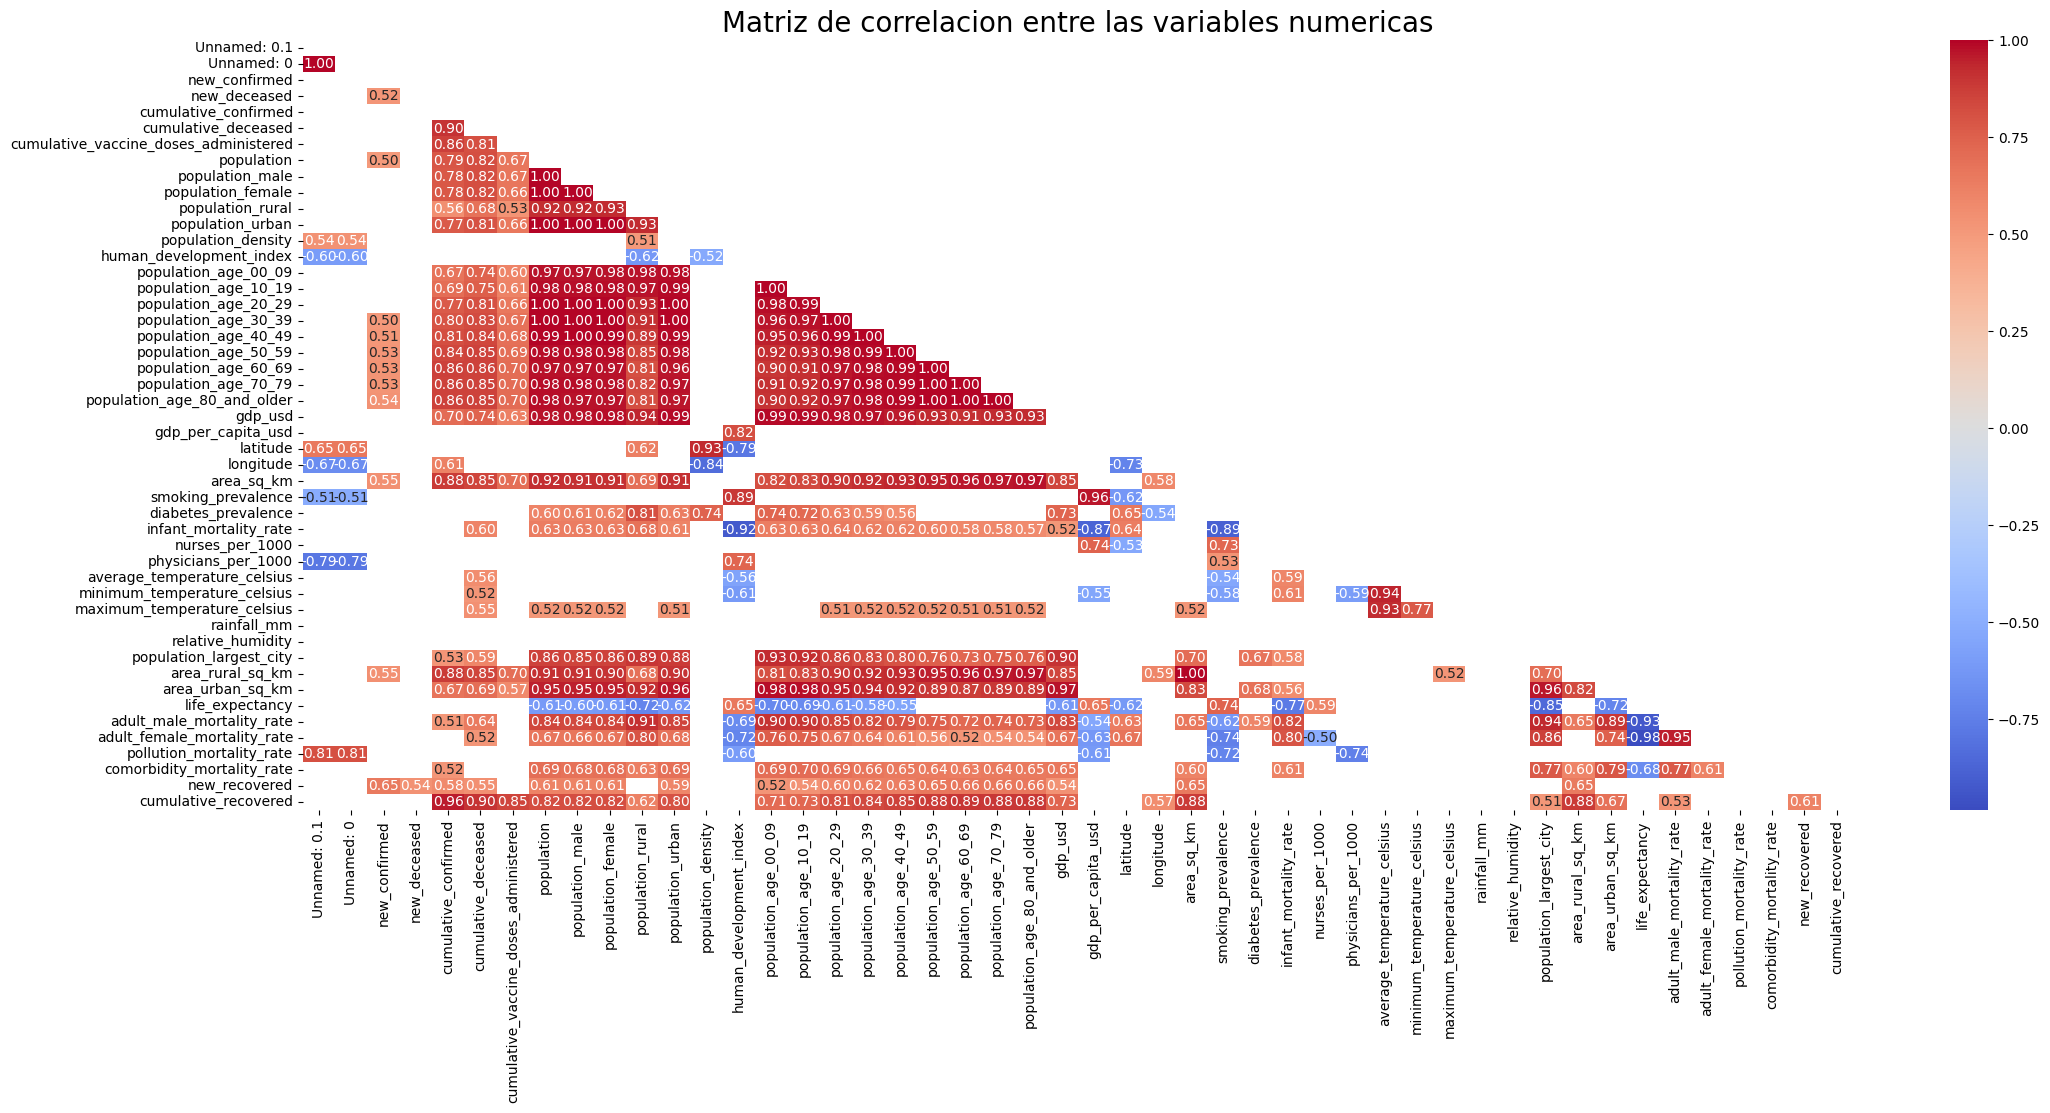

In [36]:
numeric_columns = datos_finales.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = datos_finales[numeric_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlacion entre las variables numericas', fontsize=20)
plt.show()

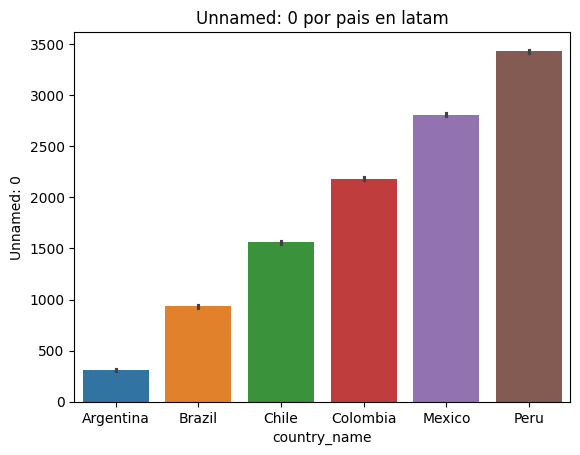

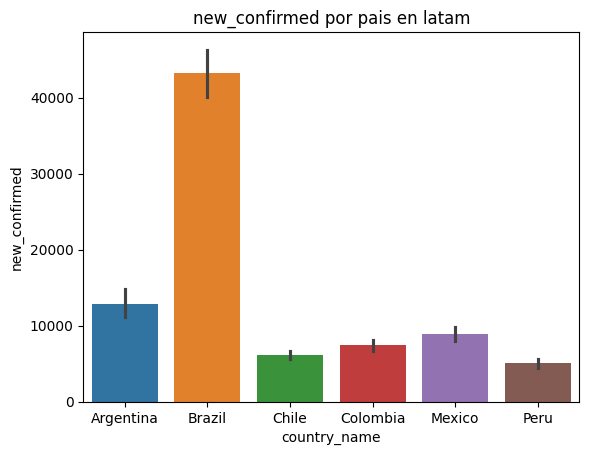

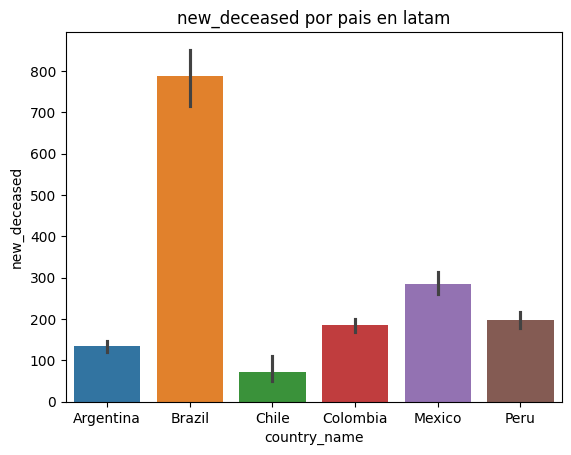

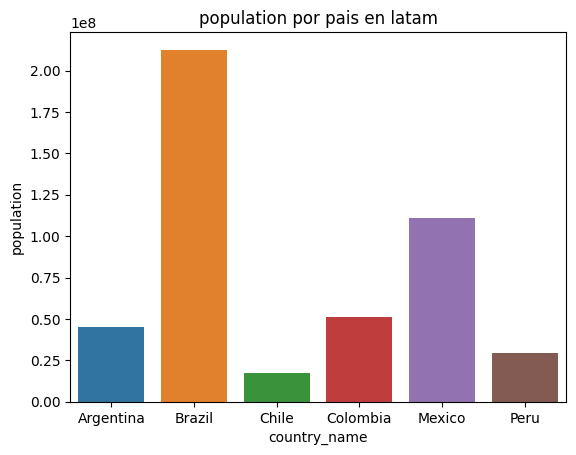

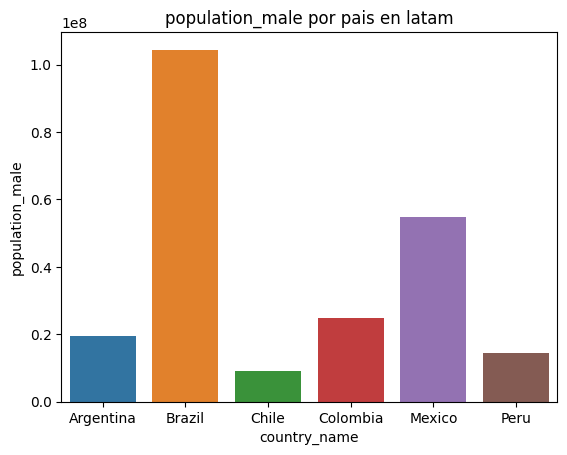

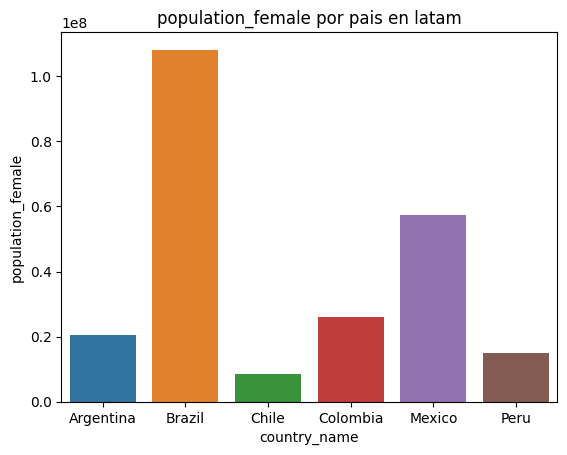

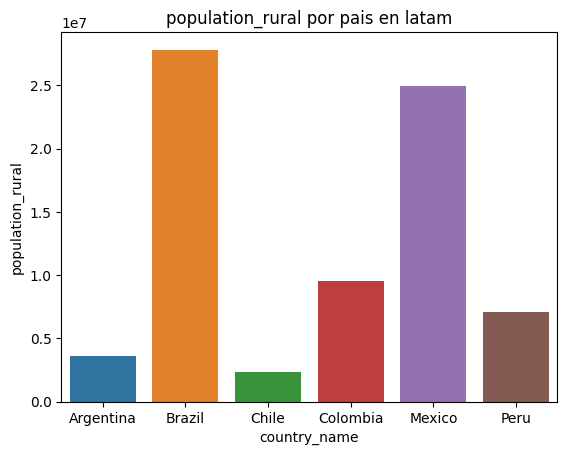

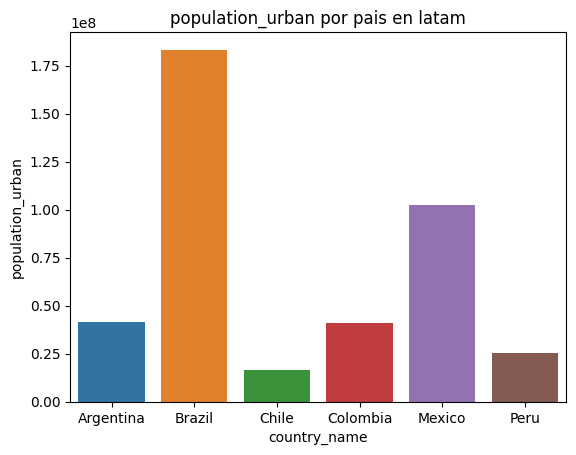

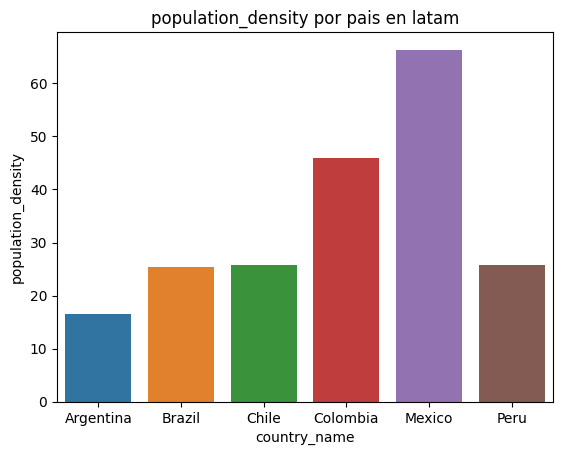

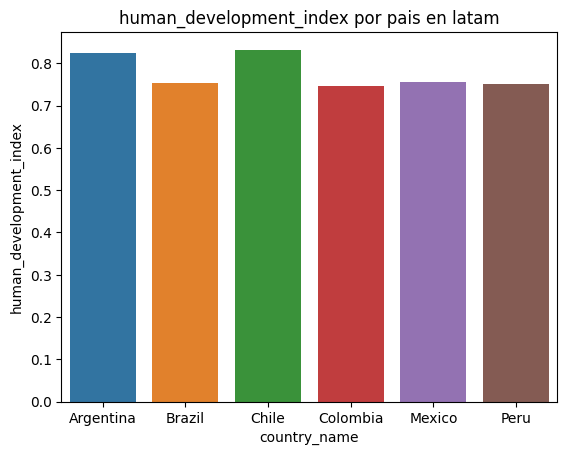

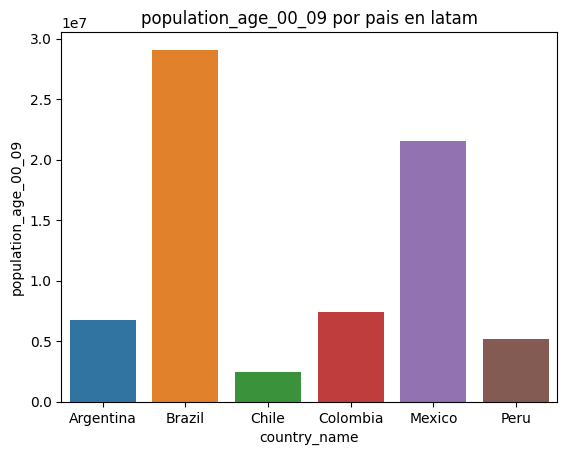

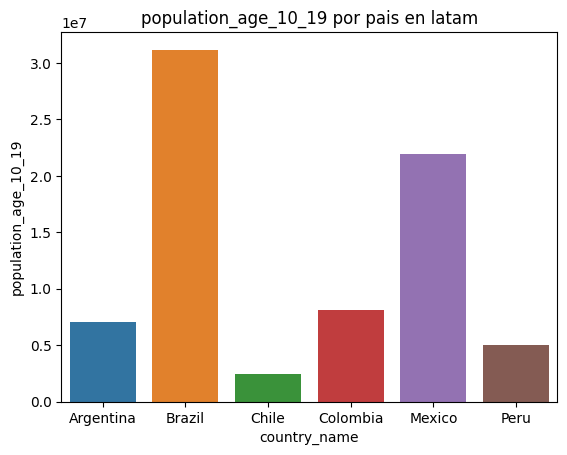

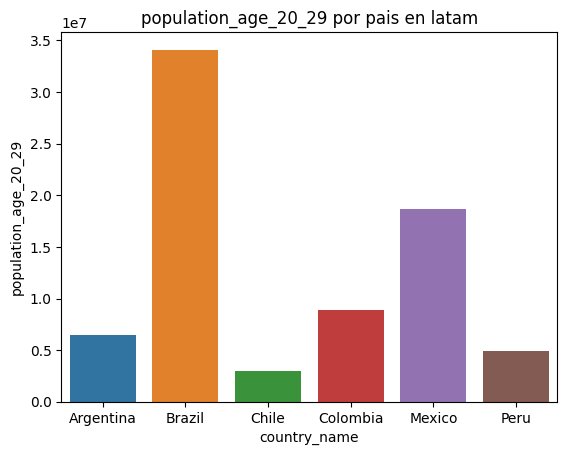

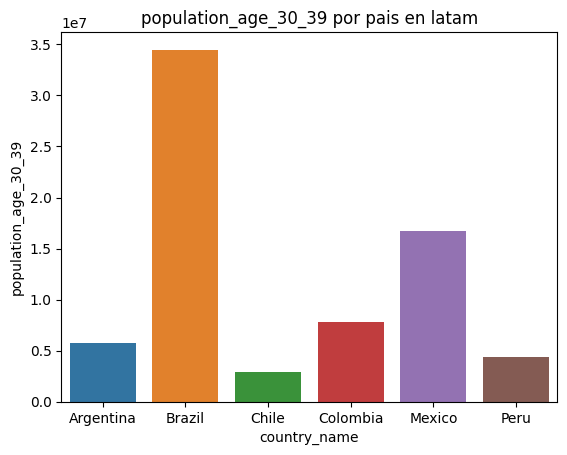

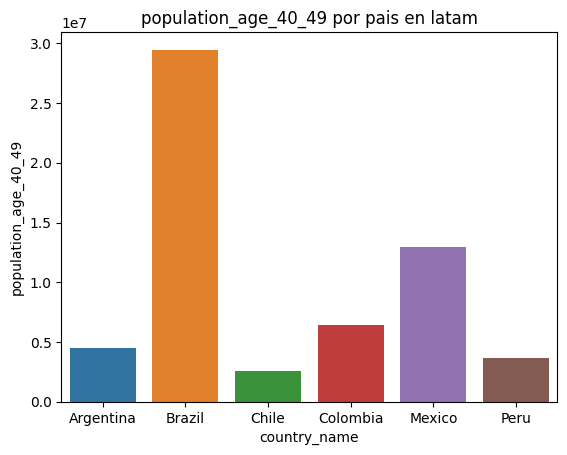

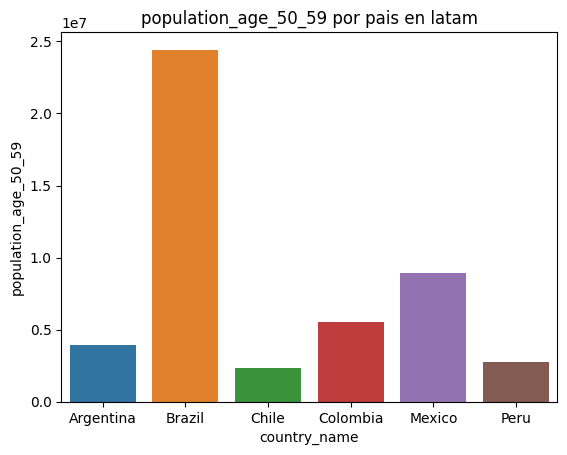

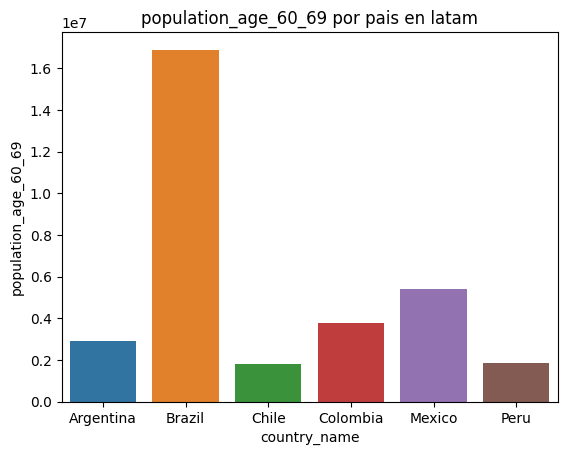

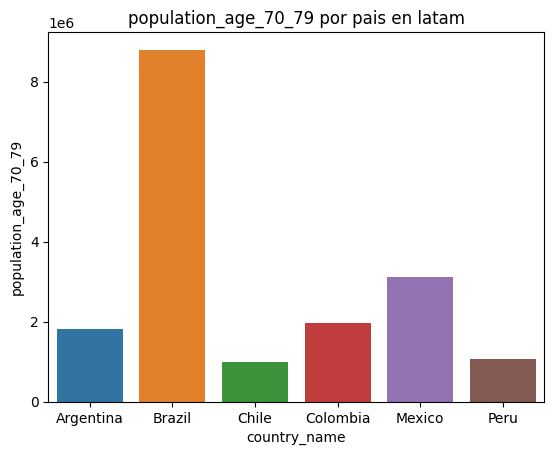

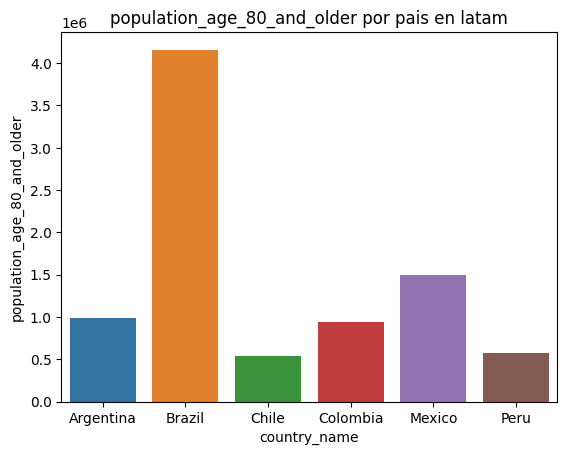

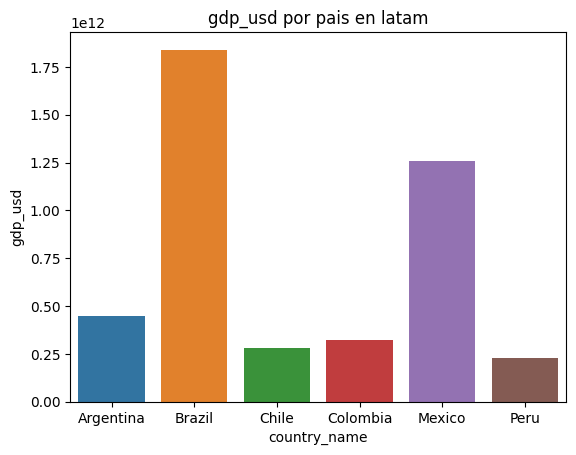

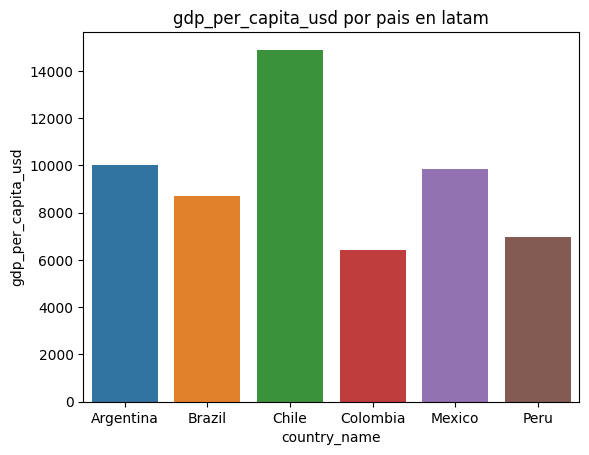

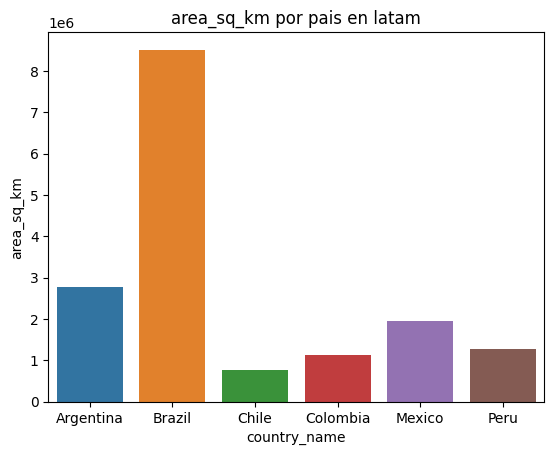

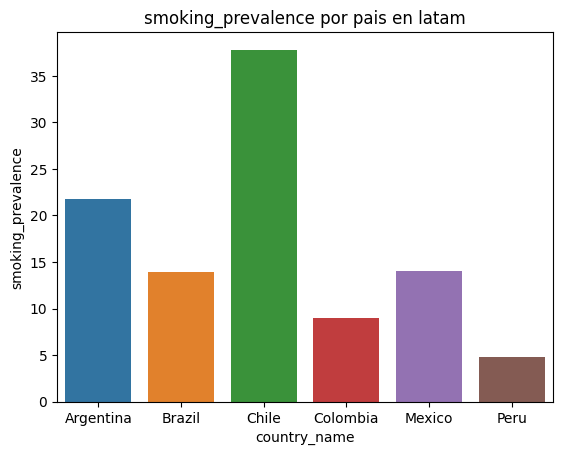

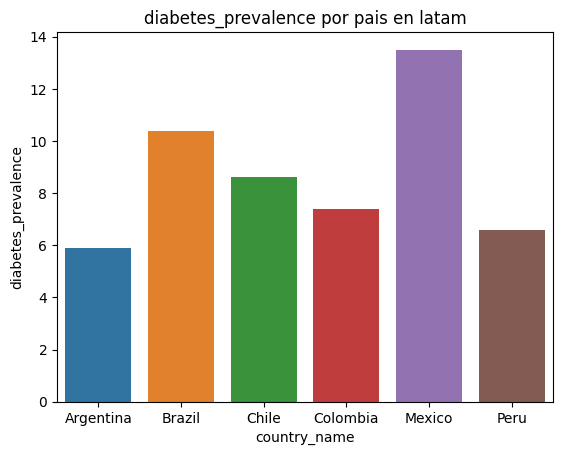

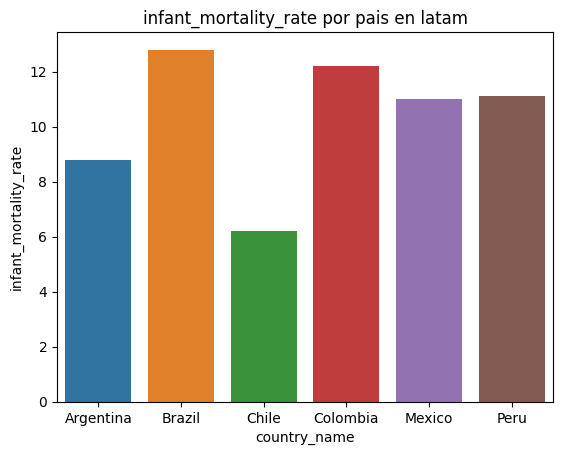

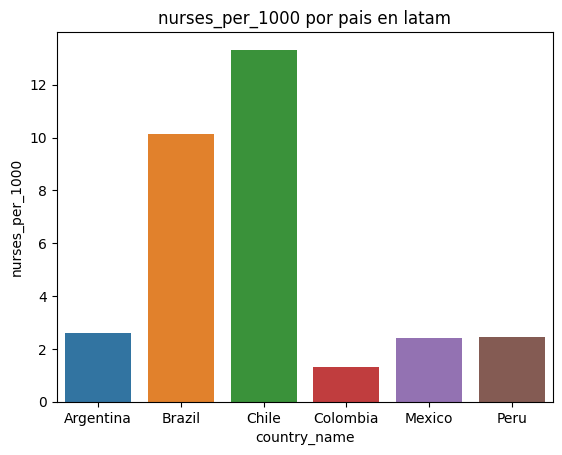

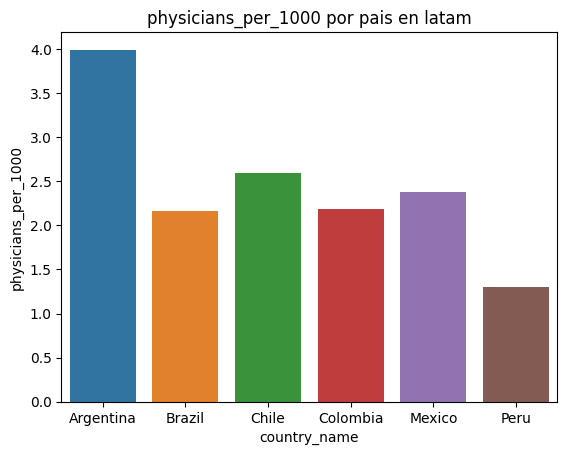

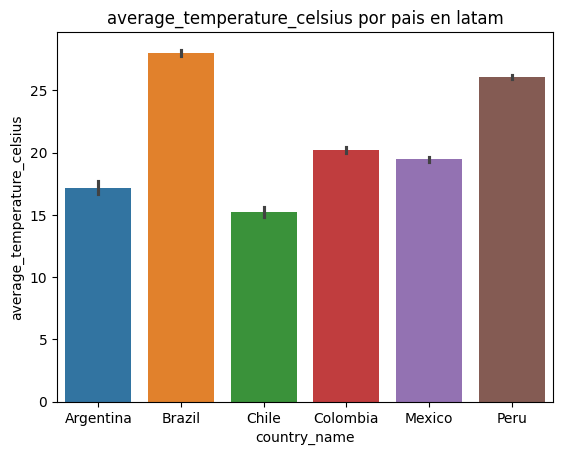

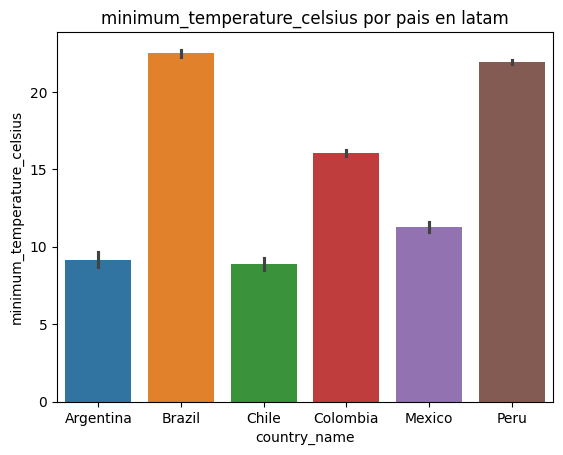

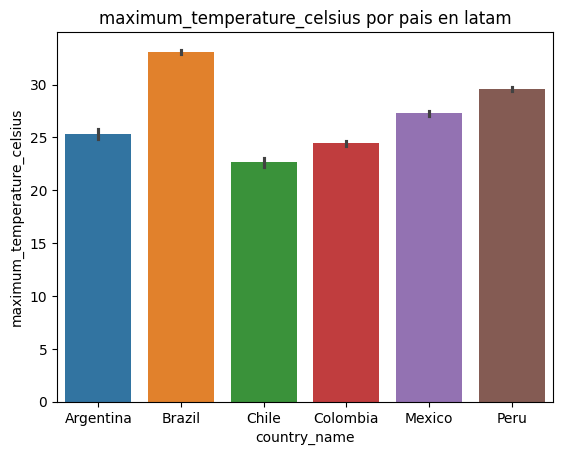

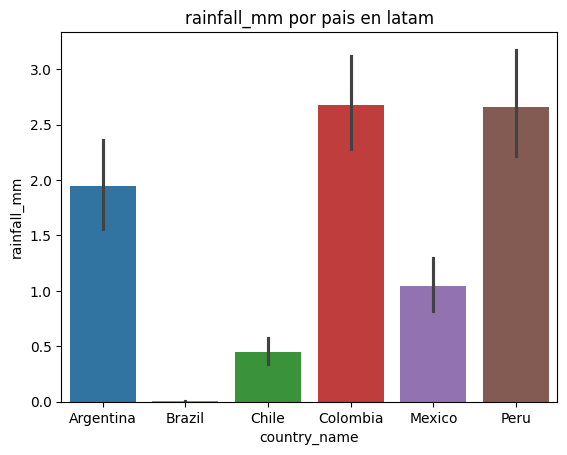

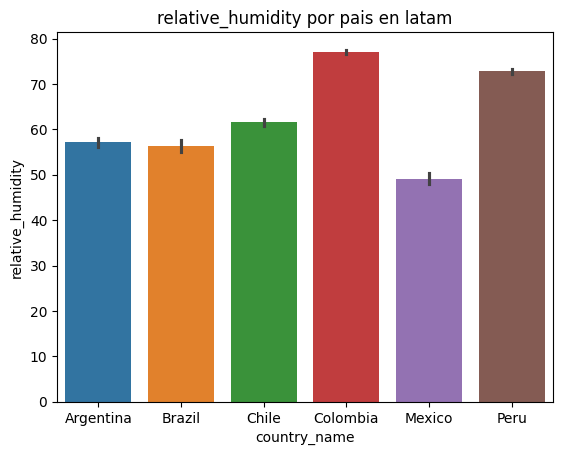

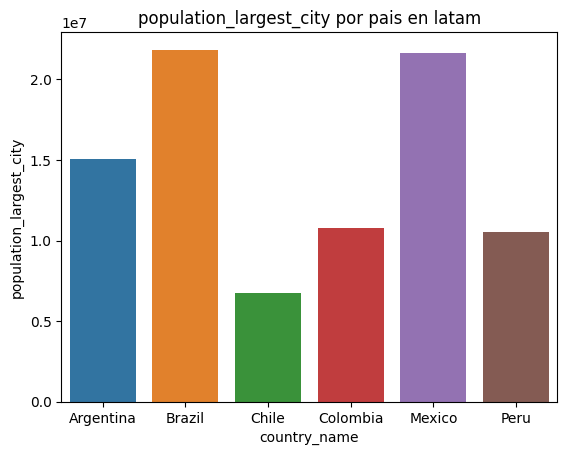

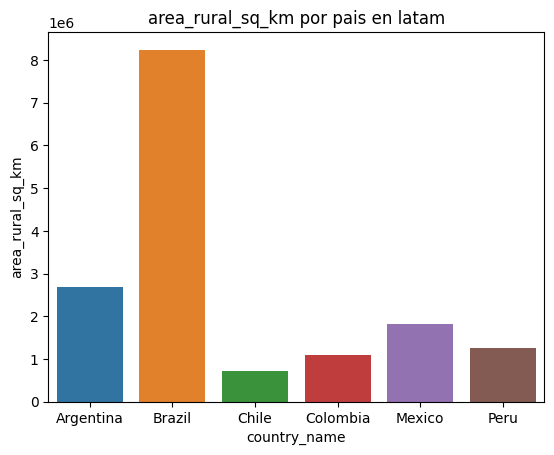

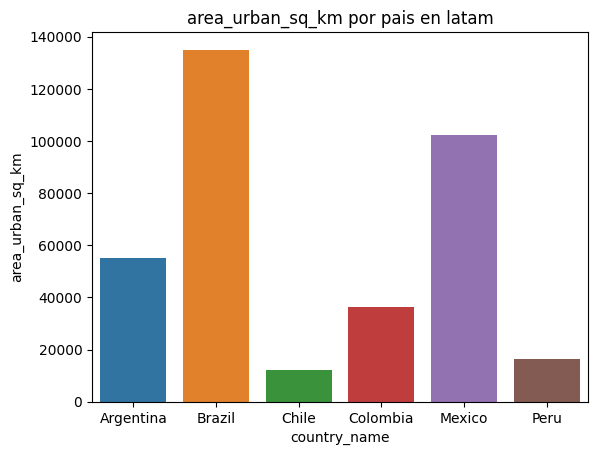

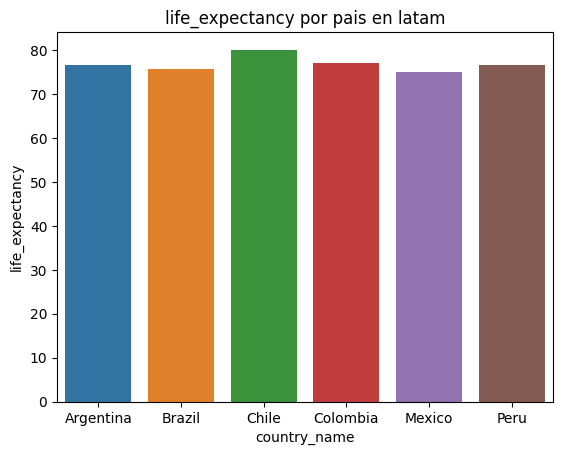

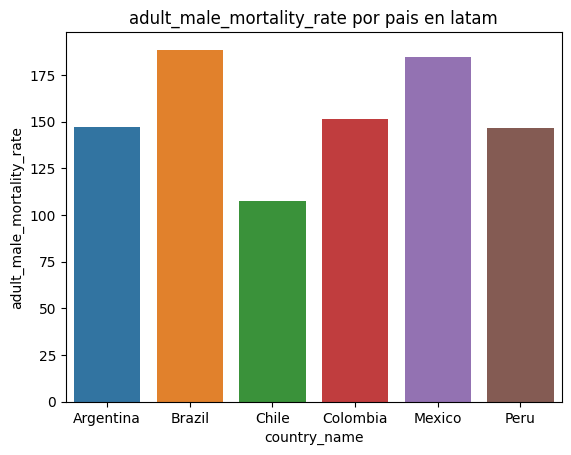

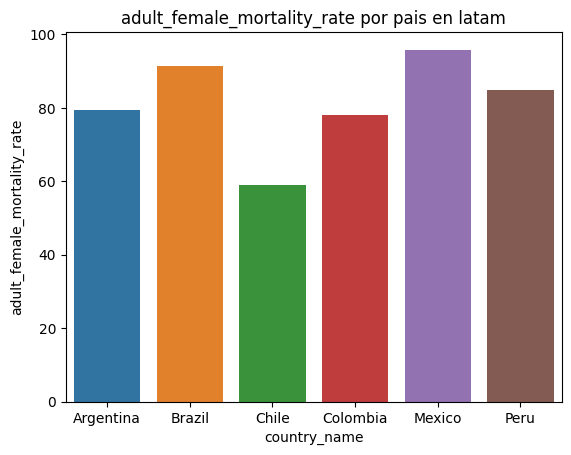

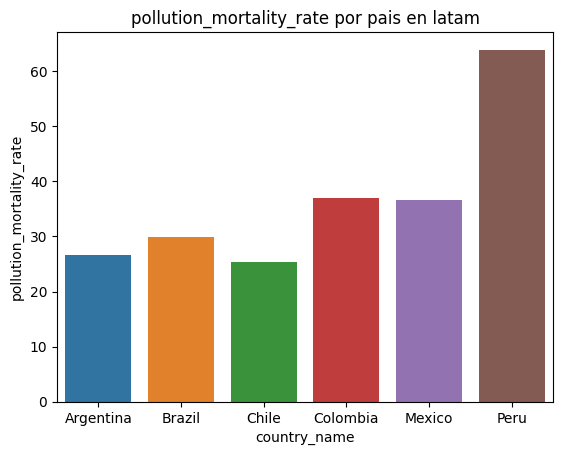

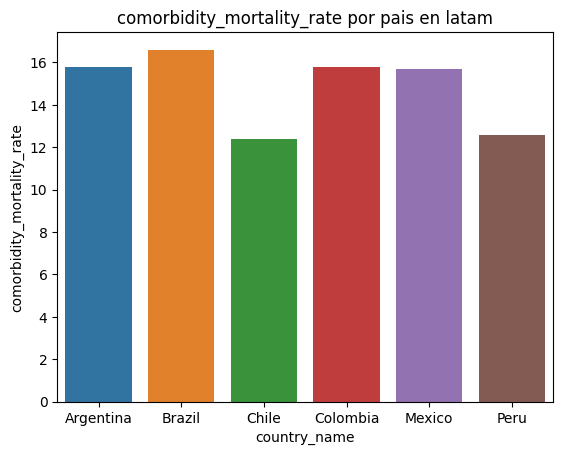

In [37]:
for la in data_latinoamerica_fecha_paises:
    if la not in  ["location_key","date","country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_deceased","cumulative_recovered",
        "cumulative_vaccine_doses_administered","new_recovered"]:
        fig, ax = plt.subplots(figure = (5, 3))
        sns.barplot(x= "country_name", y = la ,data=data_latinoamerica_fecha_paises, ax = ax, hue = "country_name")
        plt.title(f"{la} por pais en latam")
        plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


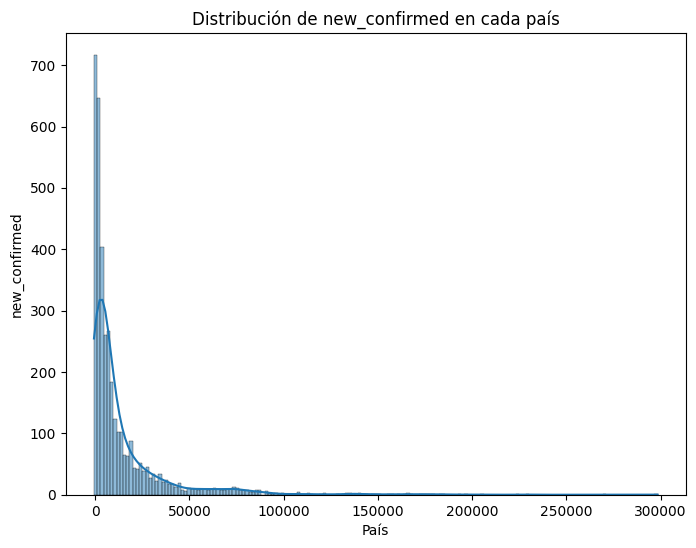

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


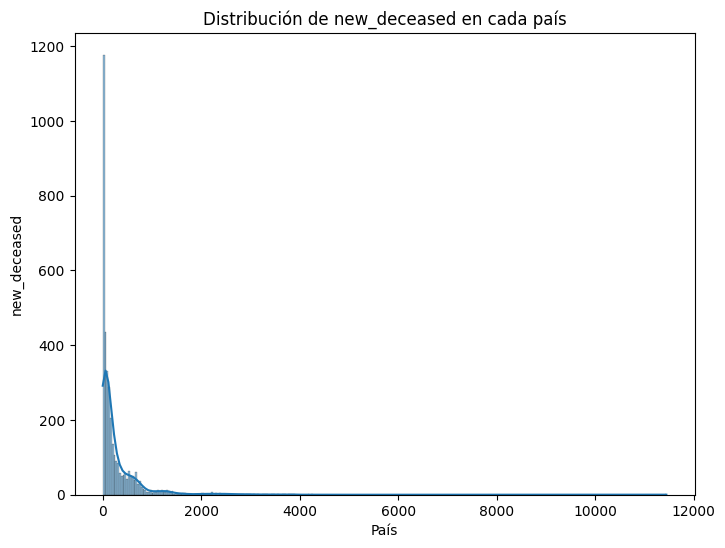

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


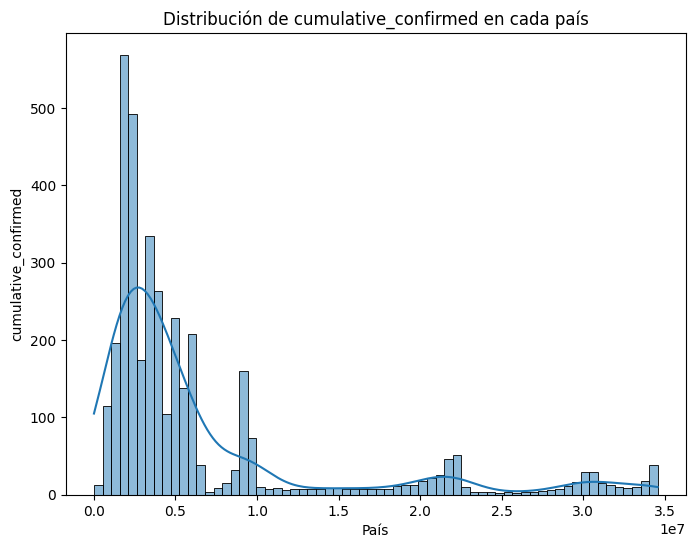

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


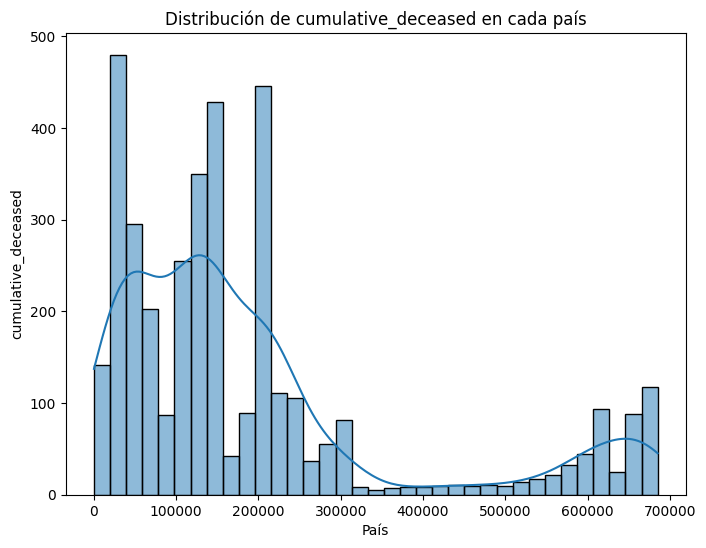

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


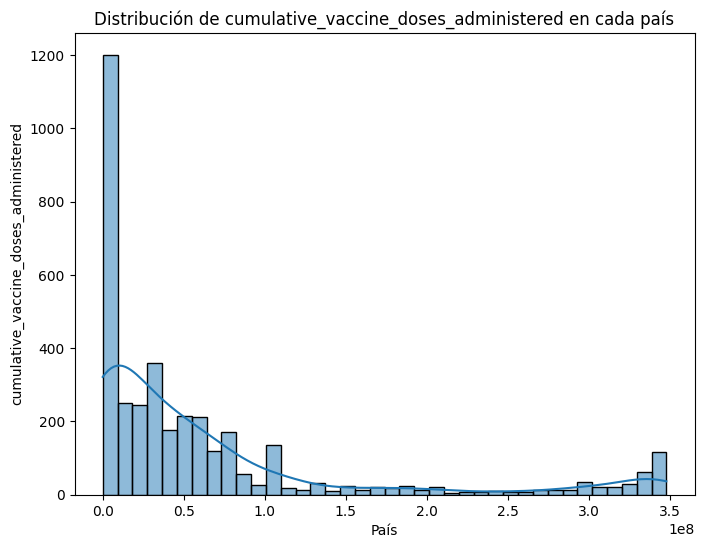

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


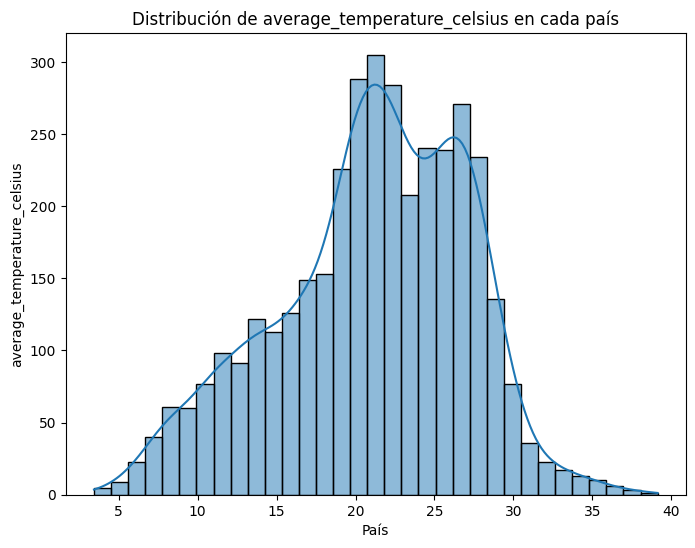

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


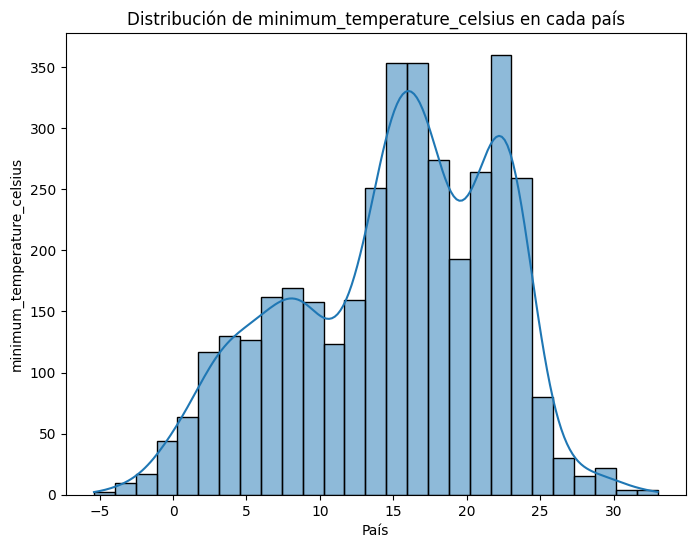

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


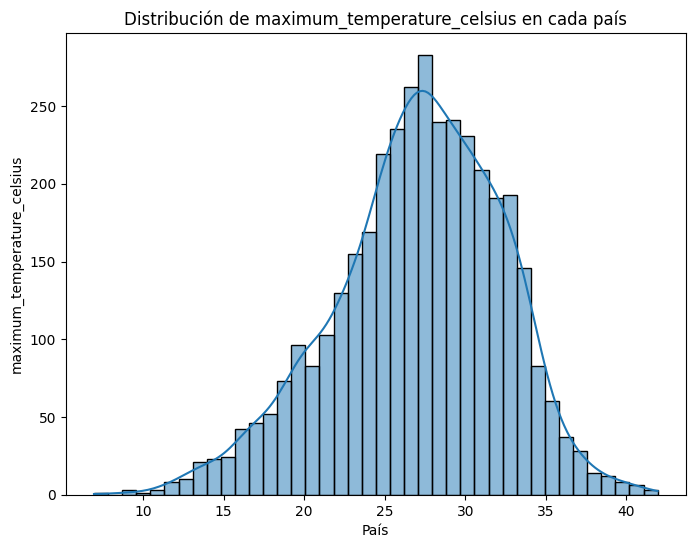

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


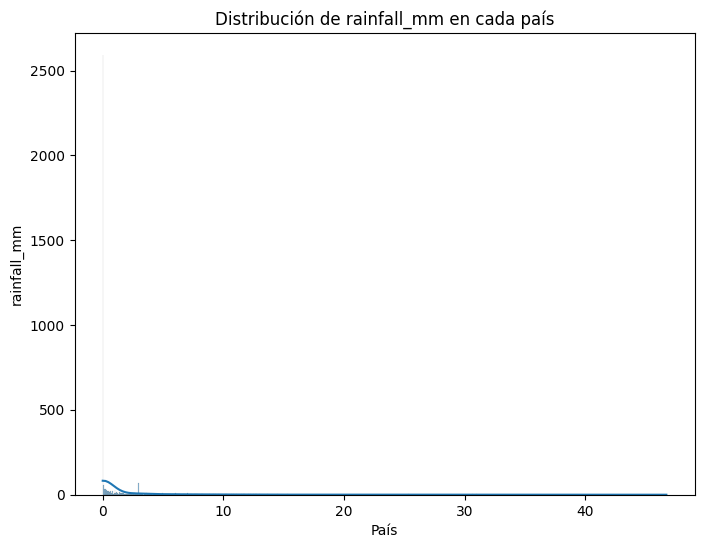

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1751347258.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


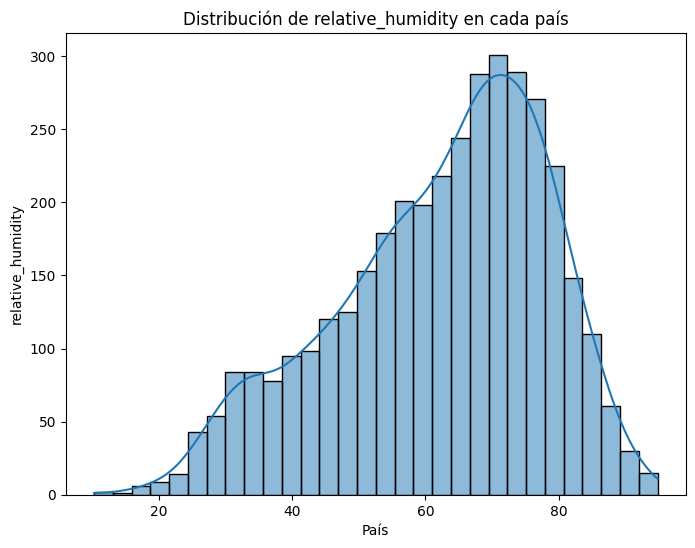

In [38]:
variables = ['new_confirmed', 'new_deceased', 'cumulative_confirmed','cumulative_deceased', 'cumulative_vaccine_doses_administered','average_temperature_celsius'
                       ,'minimum_temperature_celsius', 'maximum_temperature_celsius','rainfall_mm', 'relative_humidity']

# Loop variables en datos_finales
for columna in datos_finales[variables]:
        # histograma para la variable actual
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(datos_finales[columna], kde=True, palette="muted")
        
        # Título y etiquetas
        plt.title(f"Distribución de {columna} en cada país")
        plt.xlabel("País")
        plt.ylabel(columna)
        plt.show()

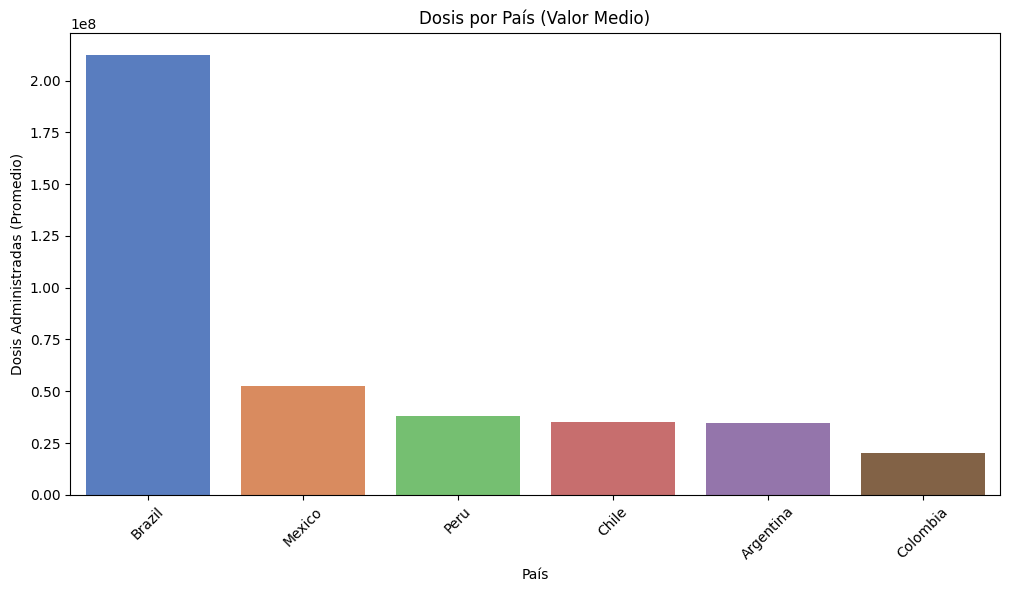

In [39]:
# valor medio de las dosis administradas para cada país
mean_doses_per_country = datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].mean()

# Ordenar los valores medios de las datos
mean_doses_per_country = mean_doses_per_country.sort_values(ascending=False).reset_index()

# gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_doses_per_country, x='country_name', y='cumulative_vaccine_doses_administered', palette="muted", hue="country_name")

# etiquetas y título
plt.title('Dosis por País (Valor Medio)')
plt.xlabel('País')
plt.ylabel('Dosis Administradas (Promedio)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejorar
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\2569045574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='muted')


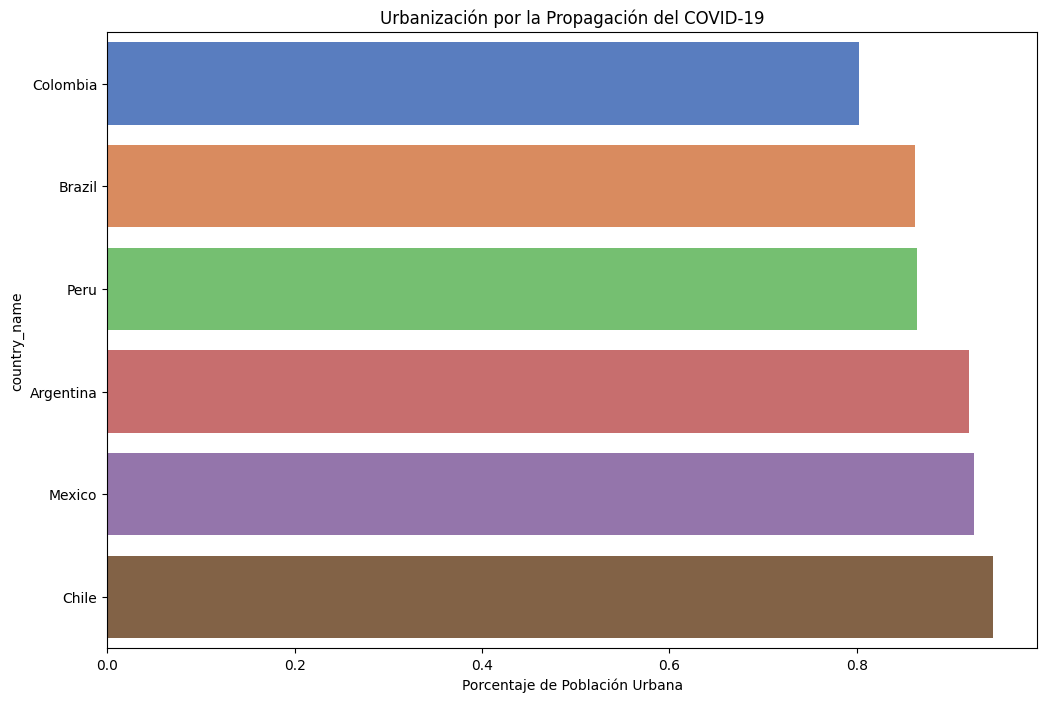

In [40]:
datos_finales['urban_population_percentage'] = datos_finales['population_urban'] / datos_finales['population']
urban_cases = datos_finales.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='muted')
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Urbanización por la Propagación del COVID-19')
plt.show()

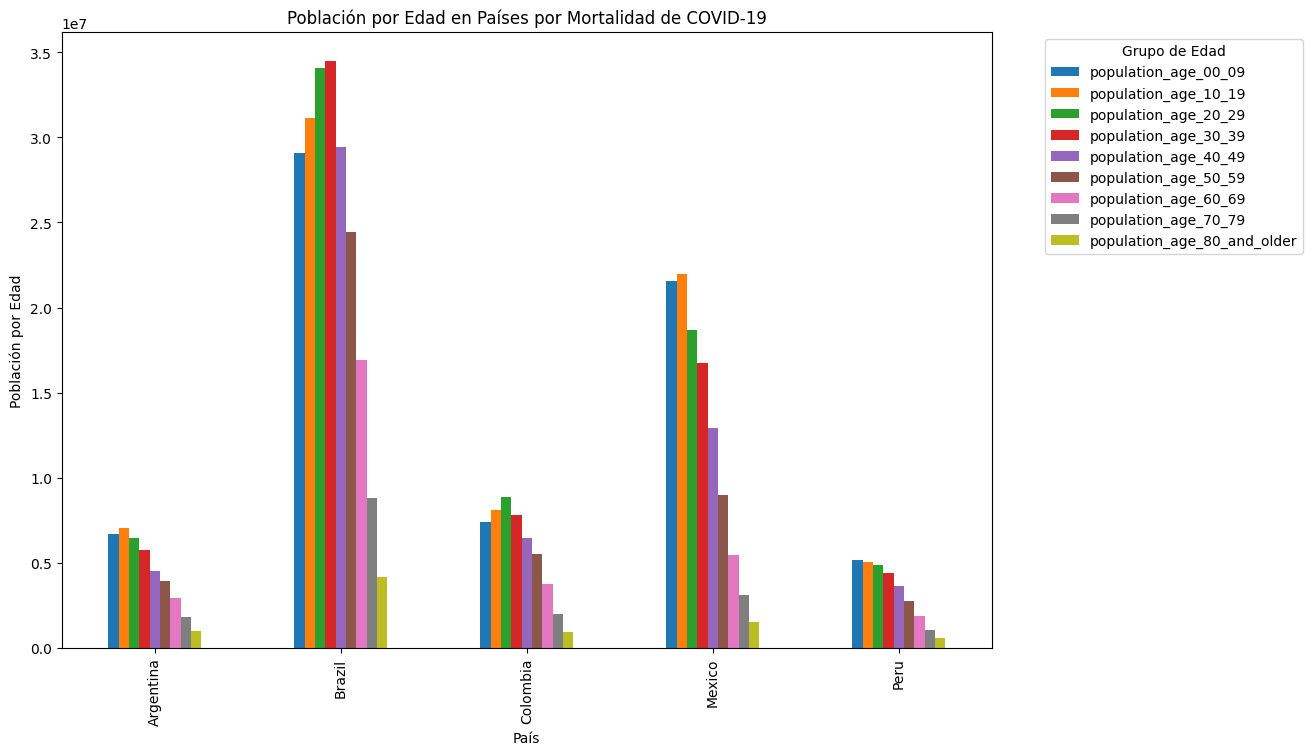

In [41]:
high_mortality_countries = datos_finales.groupby( 'country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = datos_finales[datos_finales['country_name'].isin(high_mortality_countries)].groupby('country_name') [age_groups].mean()
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Población por Edad')
plt.title('Población por Edad en Países por Mortalidad de COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Grupo de Edad')
plt.show()

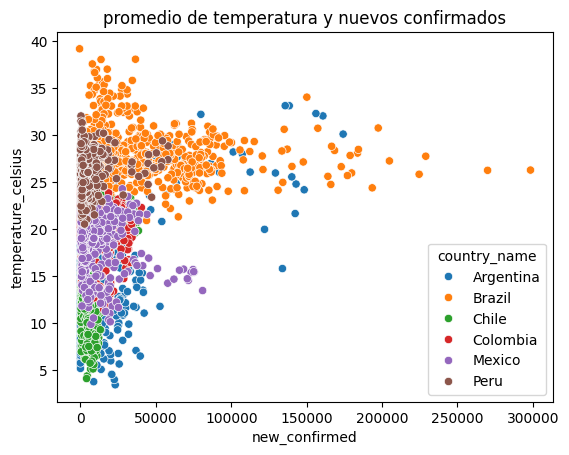

In [42]:
sns.scatterplot(data=datos_finales, x="new_confirmed", y="average_temperature_celsius", hue="country_name")
plt.title("promedio de temperatura y nuevos confirmados")
plt.xlabel("new_confirmed")
plt.ylabel("temperature_celsius")
plt.show()

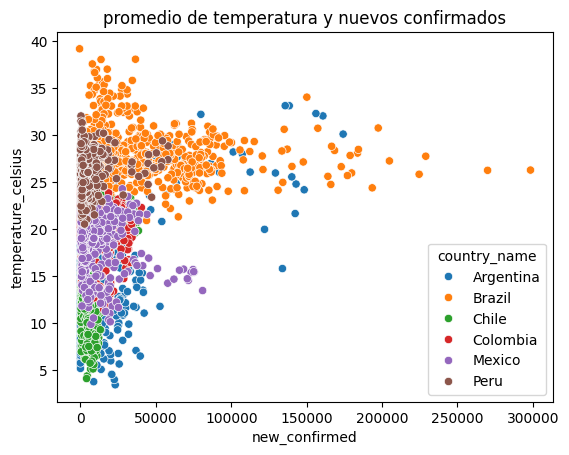

In [43]:
sns.scatterplot(data=datos_finales, x="new_confirmed", y="average_temperature_celsius", hue="country_name")
plt.title("promedio de temperatura y nuevos confirmados")
plt.xlabel("new_confirmed")
plt.ylabel("temperature_celsius")
plt.show()


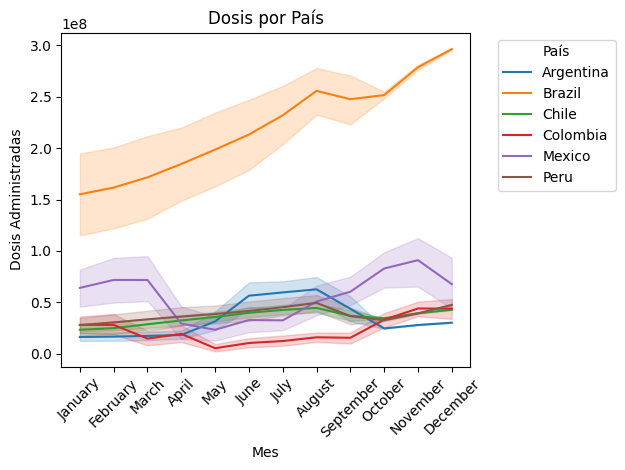

In [44]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")
sns.lineplot(data=datos_finales, x='mes', y='cumulative_vaccine_doses_administered', hue='country_name')
plt.title('Dosis por País')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\4061718939.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=datos_finales, x='mes', y='new_deceased', hue='country_name', ci=None, estimator=sum)


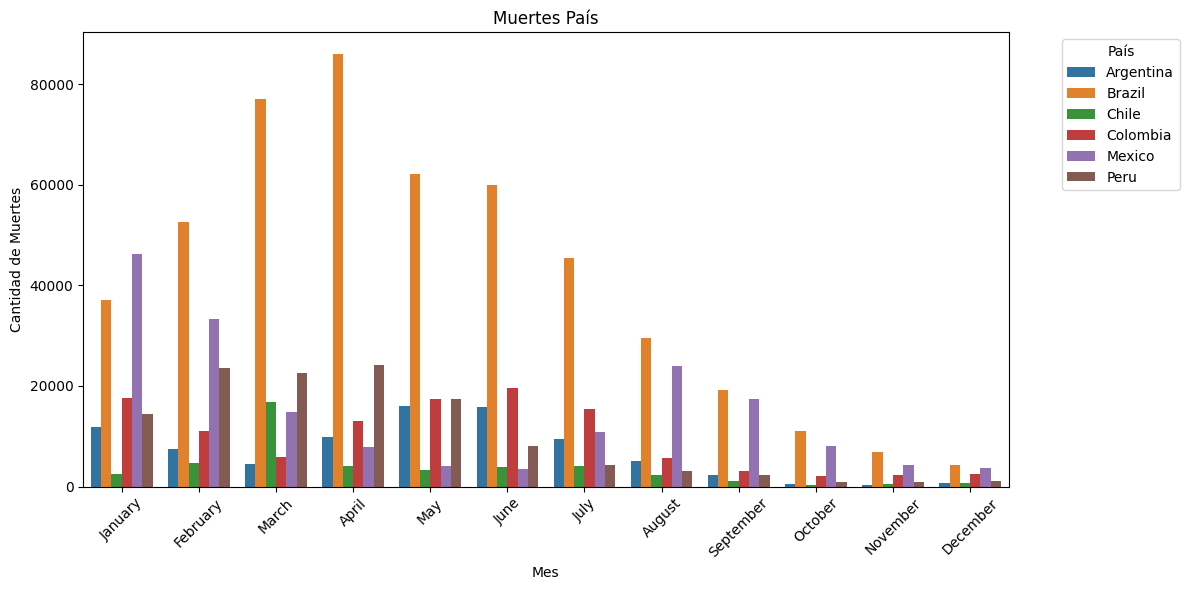

In [45]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_finales, x='mes', y='new_deceased', hue='country_name', ci=None, estimator=sum)
plt.title('Muertes País')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Muertes')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\215639181.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=datos_finales, x='mes', y='cumulative_recovered', hue='country_name', ci=None, estimator=sum)


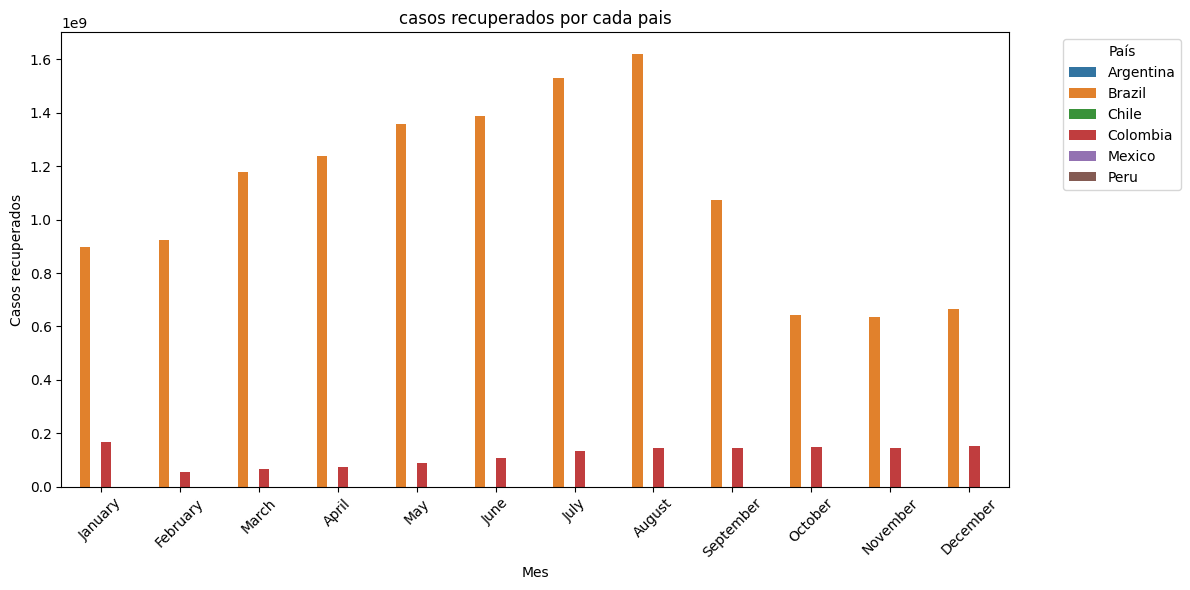

In [46]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_finales, x='mes', y='cumulative_recovered', hue='country_name', ci=None, estimator=sum)
plt.title('casos recuperados por cada pais')
plt.xlabel('Mes')
plt.ylabel('Casos recuperados')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

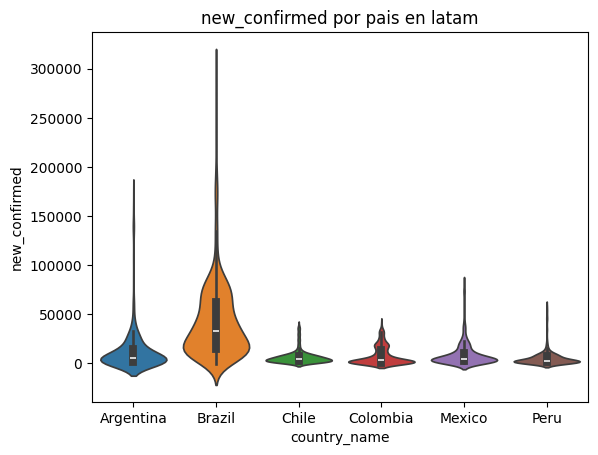

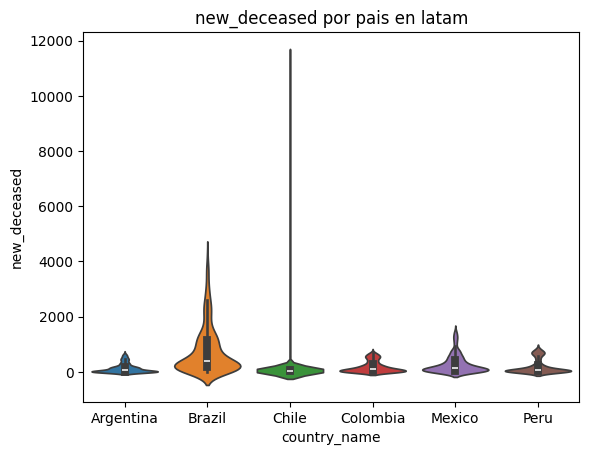

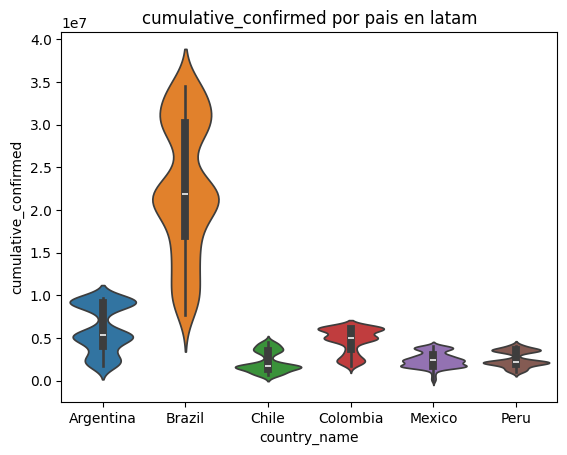

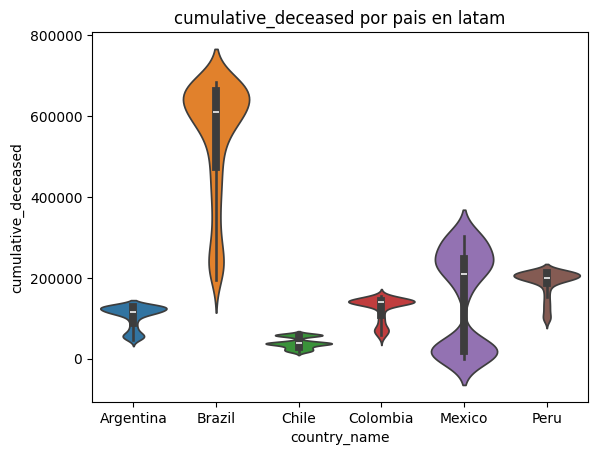

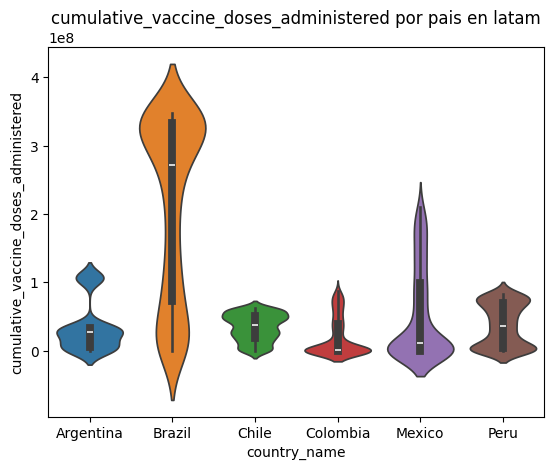

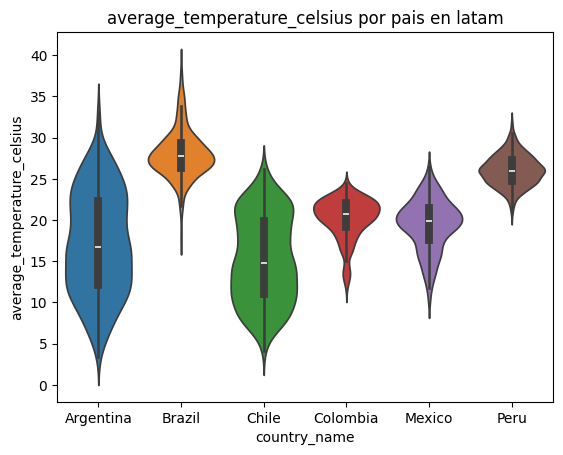

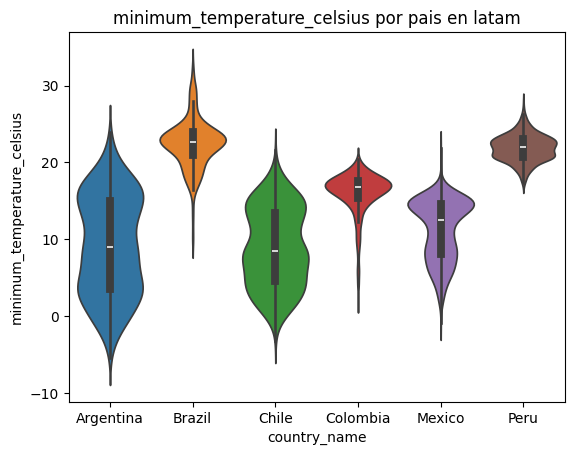

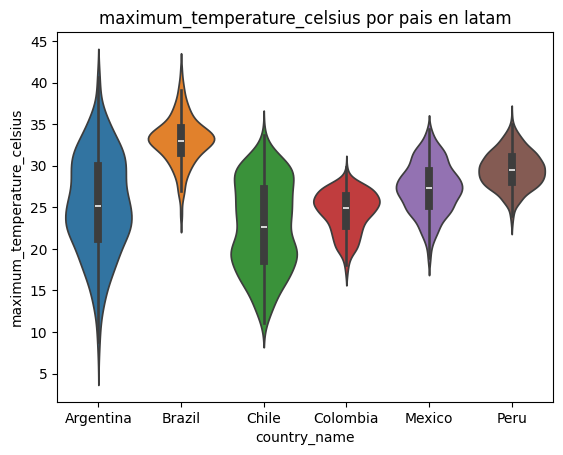

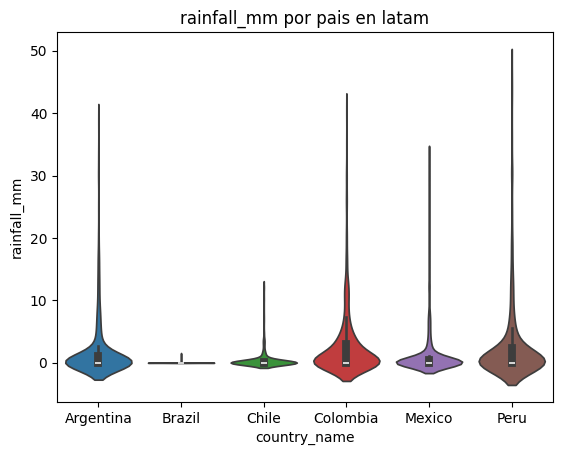

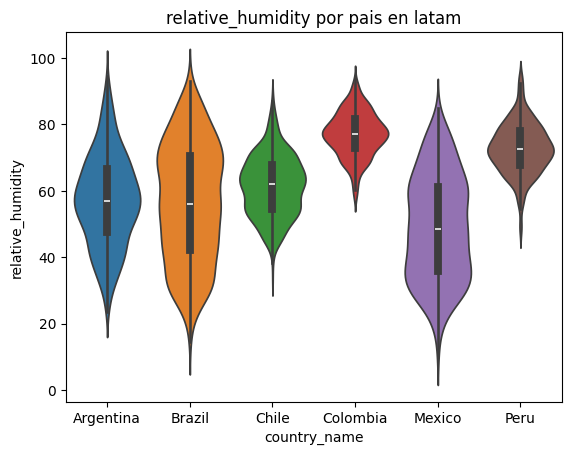

In [47]:
for la in datos_finales:
    if la in  ["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased","cumulative_vaccine_doses_administered",
              "average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","rainfall_mm","relative_humidity"]:
        fig, ax = plt.subplots(figure = (5, 3))
        sns.violinplot(x= "country_name", y = la ,data=datos_finales, ax = ax, hue = "country_name")
        plt.title(f"{la} por pais en latam")
        plt.show 

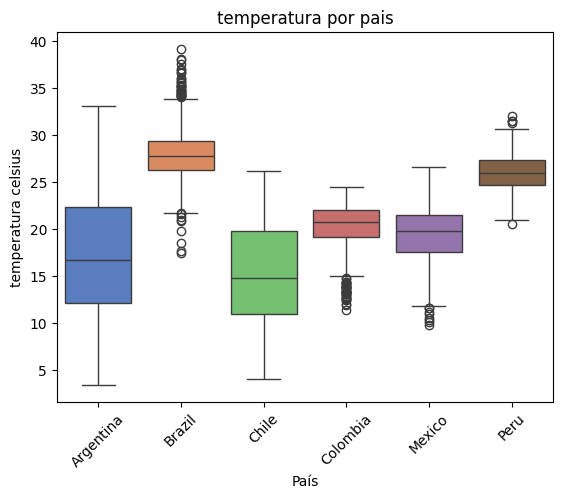

In [48]:
sns.boxplot(data=datos_finales, x="country_name", y = "average_temperature_celsius",hue="country_name",palette="muted")
plt.title('temperatura por pais')
plt.xlabel('País')
plt.ylabel('temperatura celsius')
plt.xticks(rotation=45)  
plt.show()


C:\Users\johan\AppData\Local\Temp\ipykernel_12488\512010547.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos_finales, x='mes', y='cumulative_confirmed', hue='country_name', ci=None, estimator=sum, lw=2)


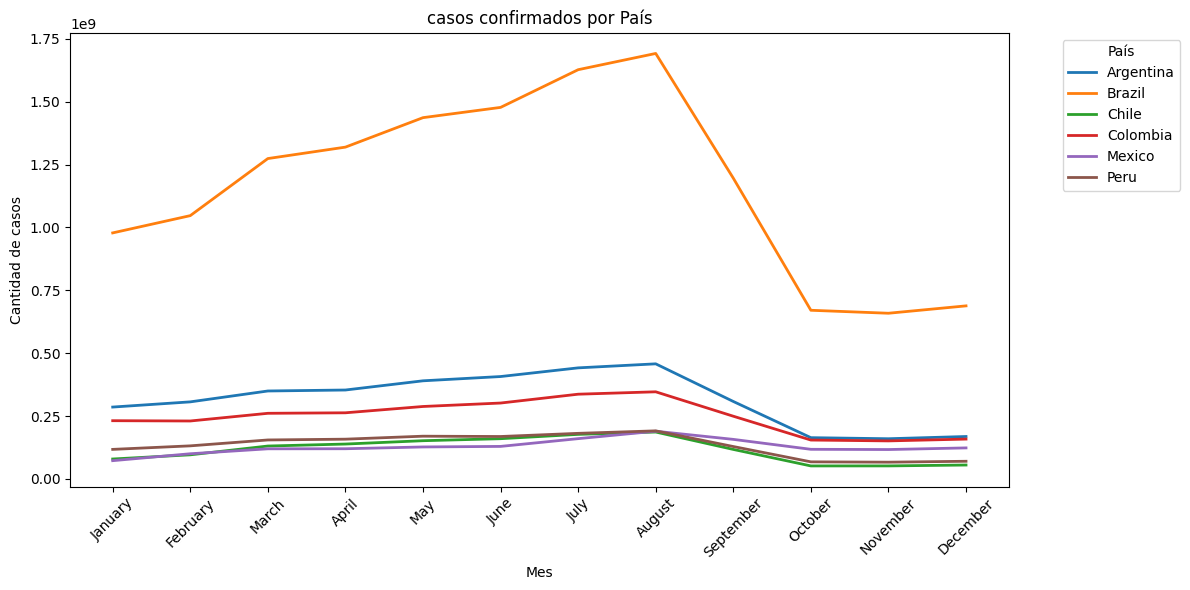

In [49]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")
plt.figure(figsize=(12, 6))
sns.lineplot(data=datos_finales, x='mes', y='cumulative_confirmed', hue='country_name', ci=None, estimator=sum, lw=2)
plt.title('casos confirmados por País')
plt.xlabel('Mes')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


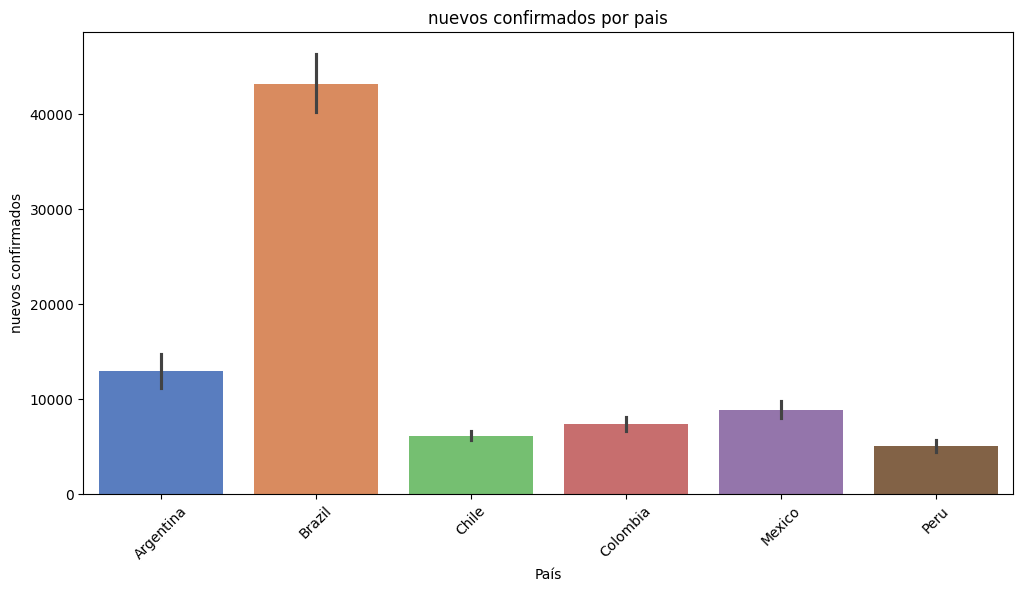

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_finales, x='country_name', y='new_confirmed', palette="muted", hue="country_name")
plt.title('nuevos confirmados por pais')
plt.xlabel('País')
plt.ylabel('nuevos confirmados')
plt.xticks(rotation=45)  
plt.show()

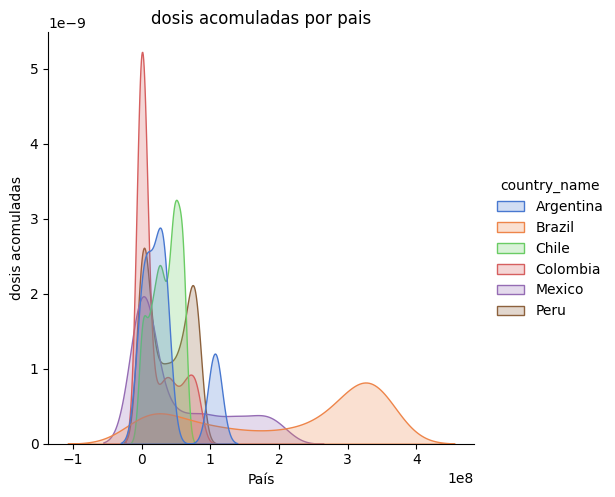

In [51]:
sns.displot(data=datos_finales, x='cumulative_vaccine_doses_administered',  palette="muted", hue="country_name", kind="kde", fill=True)
plt.title('dosis acomuladas por pais')
plt.xlabel('País')
plt.ylabel('dosis acomuladas')
plt.show()

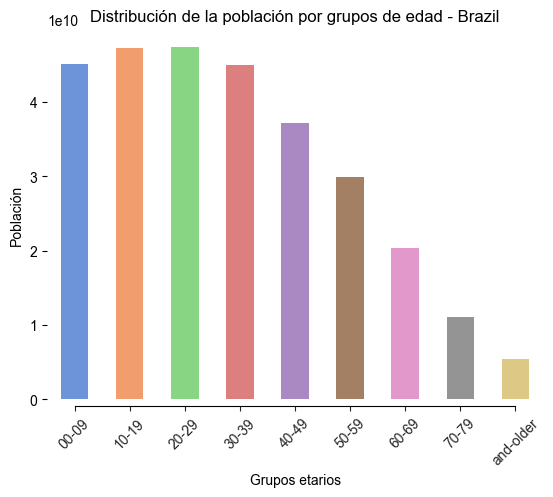

In [52]:
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
distribucion_edades = datos_finales[columnas_edad].sum()

distribucion_edades.plot(kind='bar', stacked=True, alpha=0.8, color=sns.color_palette("muted"))

plt.title(f'Distribución de la población por grupos de edad - {pais}')
plt.xlabel('Grupos etarios')
plt.ylabel('Población')
sns.set_style('darkgrid')
sns.despine(left=True, offset=5, trim=True)

plt.xticks(range(len(columnas_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in columnas_edad], rotation=45)
plt.show()

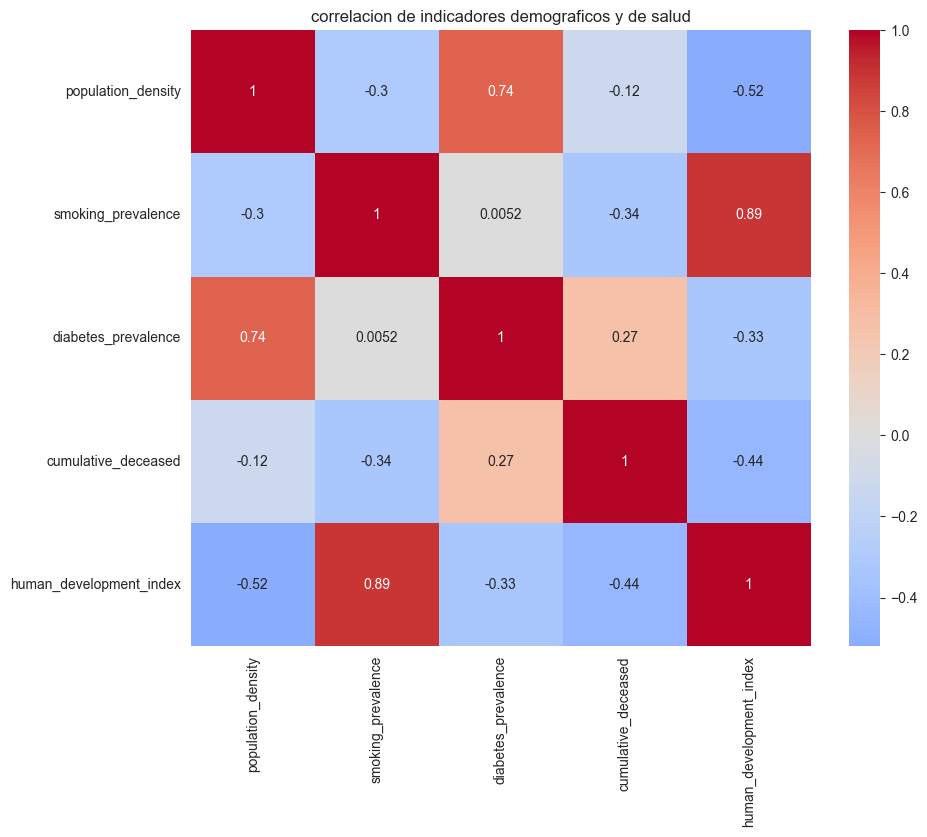

In [53]:
valores = ["population_density", "smoking_prevalence", "diabetes_prevalence", "cumulative_deceased","human_development_index"]
correlaion_m = datos_finales[valores].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlaion_m, annot=True, cmap="coolwarm", center=0)
plt.title("correlacion de indicadores demograficos y de salud")
plt.show()

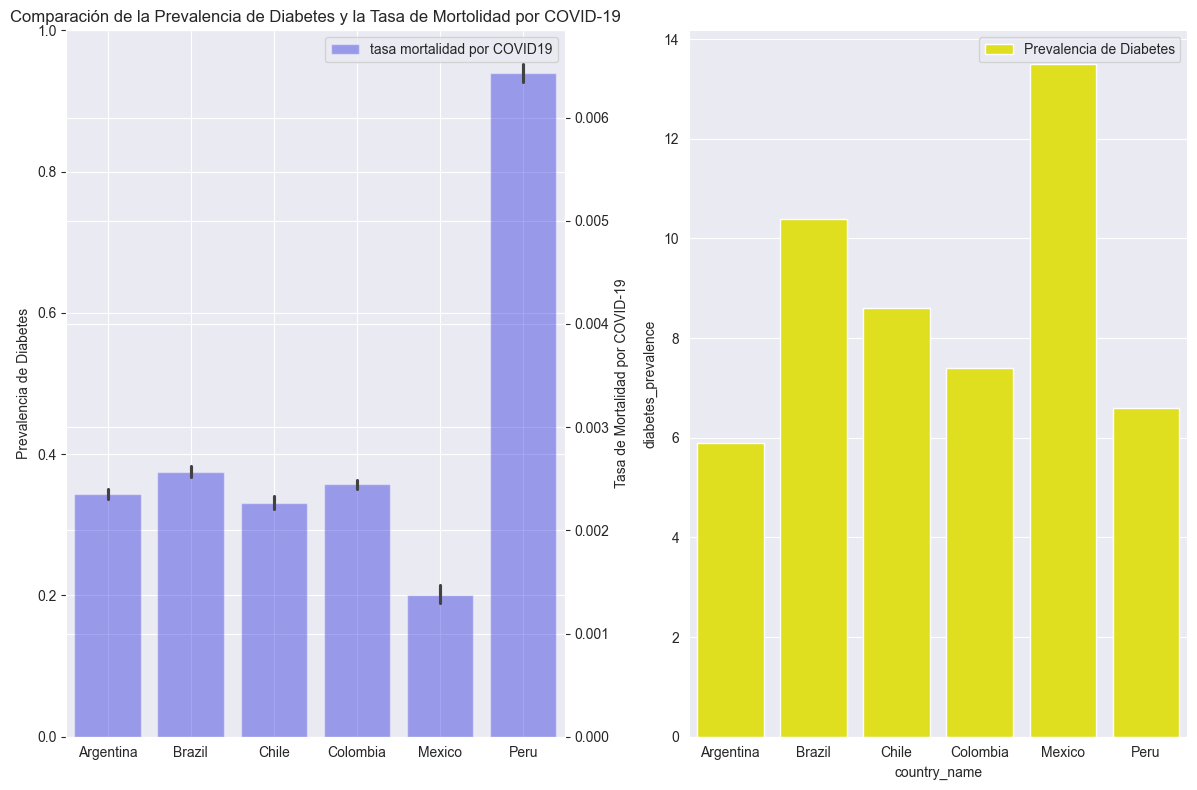

In [54]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=datos_finales, x=datos_finales["country_name"], y = datos_finales["diabetes_prevalence"], color="yellow", label="Prevalencia de Diabetes")
ax2 = ax.twinx()
sns.barplot(data=datos_finales, x= datos_finales ["country_name"], y= datos_finales["cumulative_deceased"] / datos_finales['population'], color=("blue"), label="tasa mortalidad por COVID19", ax=ax2,alpha=0.4 )

plt.xticks(rotation=90)

ax.set_ylabel("Prevalencia de Diabetes")

ax2.set_ylabel("Tasa de Mortalidad por COVID-19")

plt.title("Comparación de la Prevalencia de Diabetes y la Tasa de Mortolidad por COVID-19")
plt.tight_layout()
plt.show()

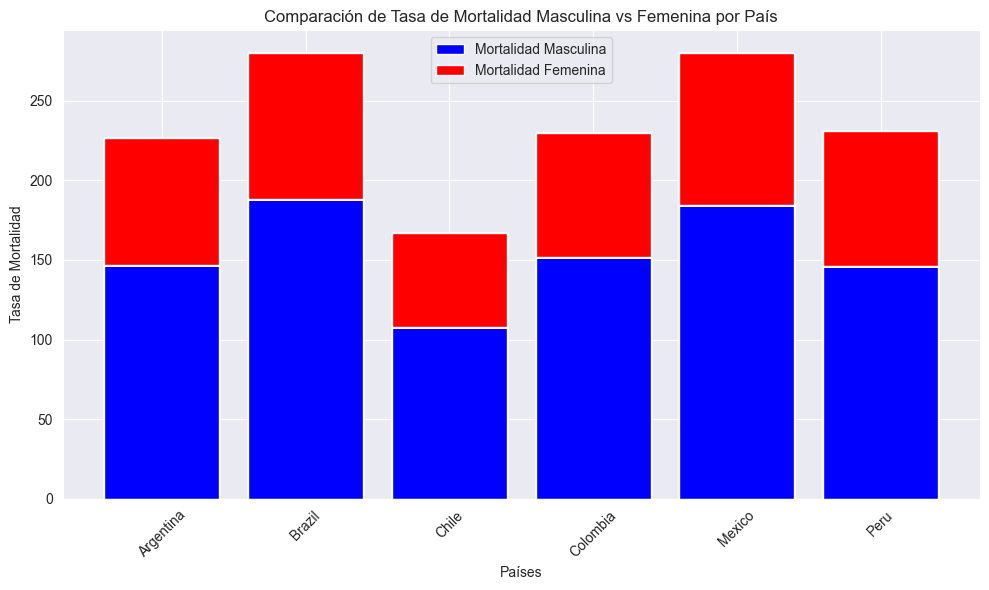

In [55]:
plt.figure(figsize=(10, 6))
plt.bar((datos_finales["country_name"]), (datos_finales["adult_male_mortality_rate"]), label='Mortalidad Masculina', color='blue')
plt.bar((datos_finales["country_name"]), (datos_finales["adult_female_mortality_rate"]), bottom=(datos_finales["adult_male_mortality_rate"]), label='Mortalidad Femenina', color='red')

plt.xlabel('Países')
plt.ylabel('Tasa de Mortalidad')
plt.title('Comparación de Tasa de Mortalidad Masculina vs Femenina por País')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## AVANCE 3

CREACION DE GRAFICAS RESTANTES SEGUN LAS CONSIGNAS

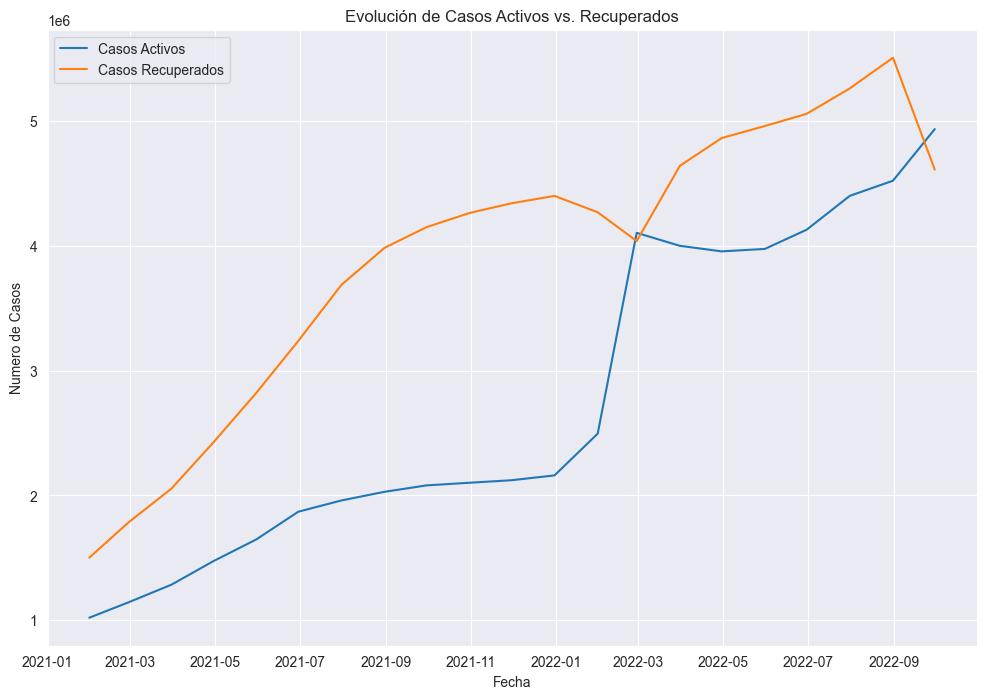

In [57]:
datos_finales["active_cases"] = datos_finales["cumulative_confirmed"] - datos_finales["cumulative_deceased"] - datos_finales["cumulative_recovered"]
plt.figure(figsize=(12, 8))

sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True), x="date", y ="active_cases" , label="Casos Activos")
sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True), x="date", y = "cumulative_recovered",label="Casos Recuperados")

plt.title('Evolución de Casos Activos vs. Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')

plt.show()

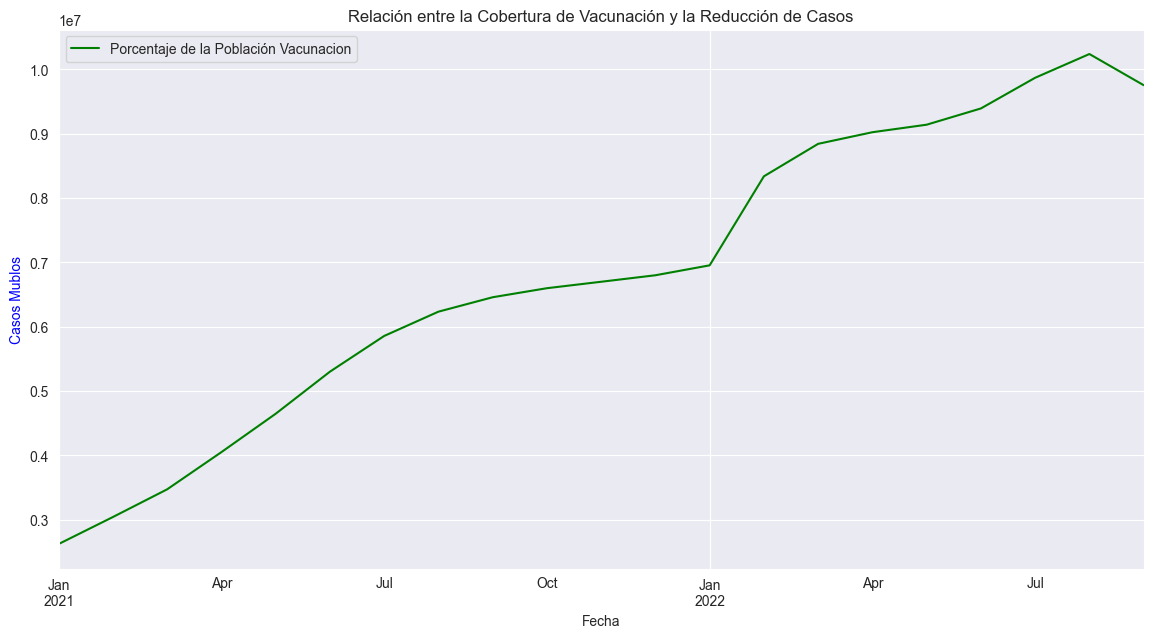

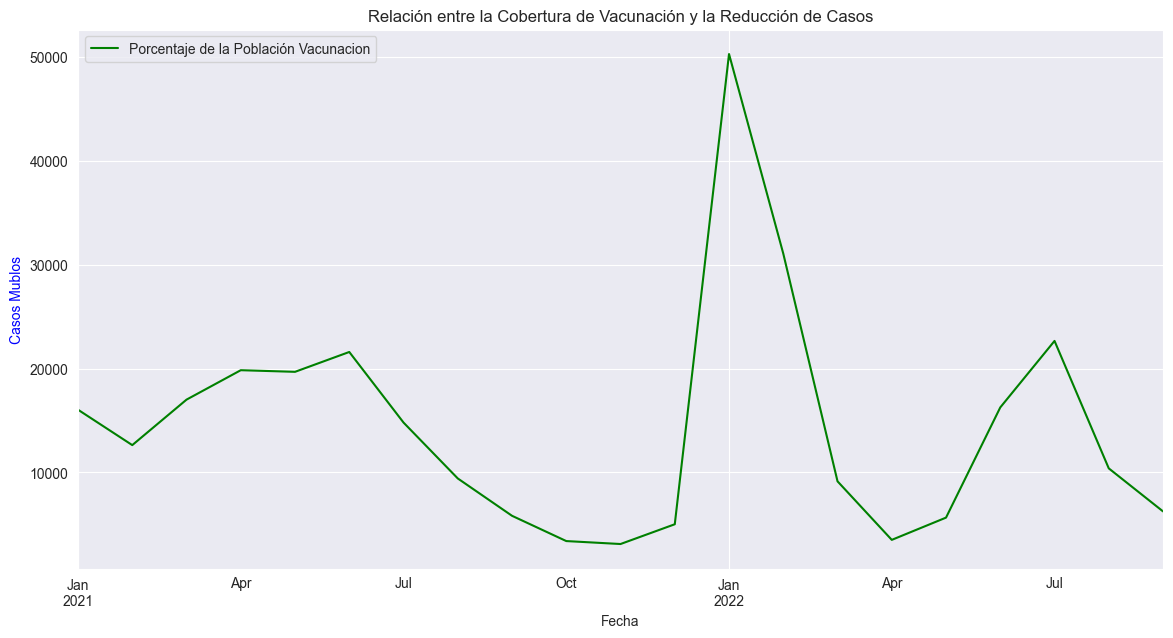

In [58]:
plt.figure(figsize=(14, 7))

ax1 = plt.gca()


#crea percentajes de vacunación
datos_finales["percentage_growth"] = datos_finales["cumulative_confirmed"] - datos_finales["cumulative_confirmed"] / datos_finales["cumulative_confirmed"]*100
datos_finales.resample('ME').mean(numeric_only=True)["percentage_growth"].plot(ax=ax1, color="green", label="Porcentaje de la Población Vacunacion")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Mublos", color="blue")
#ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

plt.show()


plt.figure(figsize=(14, 7))

ax1 = plt.gca()


#crea percentajes de vacunación
datos_finales["percentage_growth"] = datos_finales["new_confirmed"] - datos_finales["new_confirmed"] / datos_finales["new_confirmed"]*100
datos_finales.resample('ME').mean(numeric_only=True)["percentage_growth"].plot(ax=ax1, color="green", label="Porcentaje de la Población Vacunacion")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Mublos", color="blue")
#ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

plt.show()

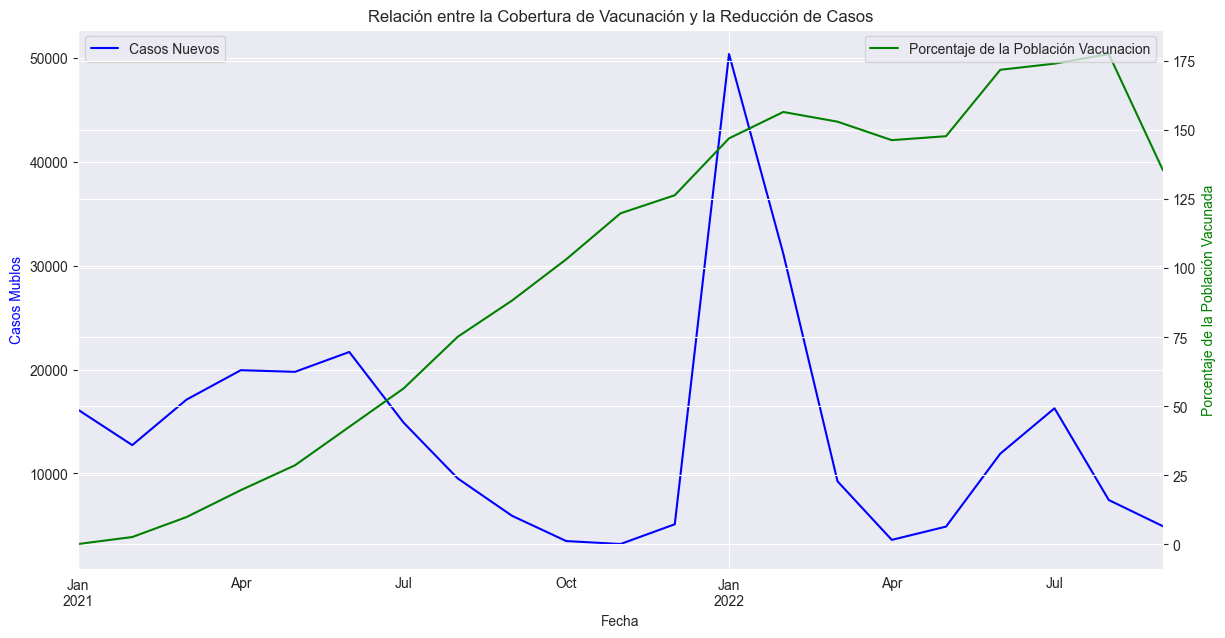

In [59]:
plt.figure(figsize=(14, 7))

ax1 = plt.gca()
ax2 = ax1.twinx()

datos_finales["percentage_vaccinated"] = datos_finales["cumulative_vaccine_doses_administered"] / datos_finales["population"]*100
datos_finales.resample('ME').mean(numeric_only=True)["new_confirmed"].plot(ax=ax1, color="blue", label="Casos Nuevos")
datos_finales.resample('ME').mean(numeric_only=True)["percentage_vaccinated"].plot(ax=ax2, color="green", label="Porcentaje de la Población Vacunacion")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Mublos", color="blue")
ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

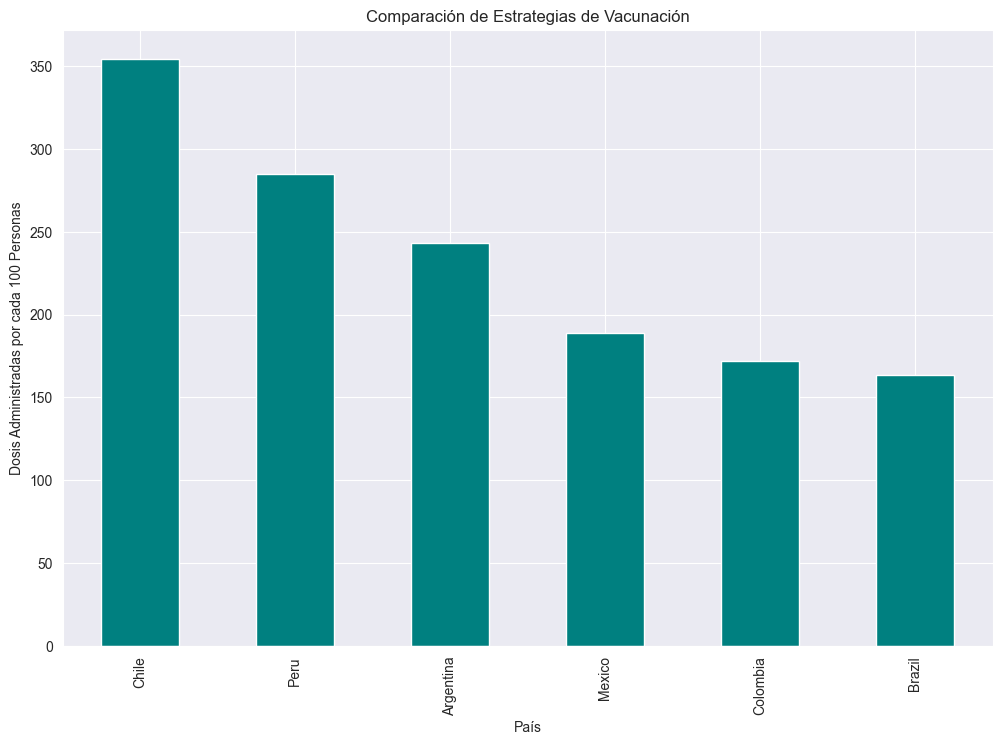

In [60]:
vaccination_strategy = datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / datos_finales.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel( 'País')
plt.ylabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación')
plt.show()

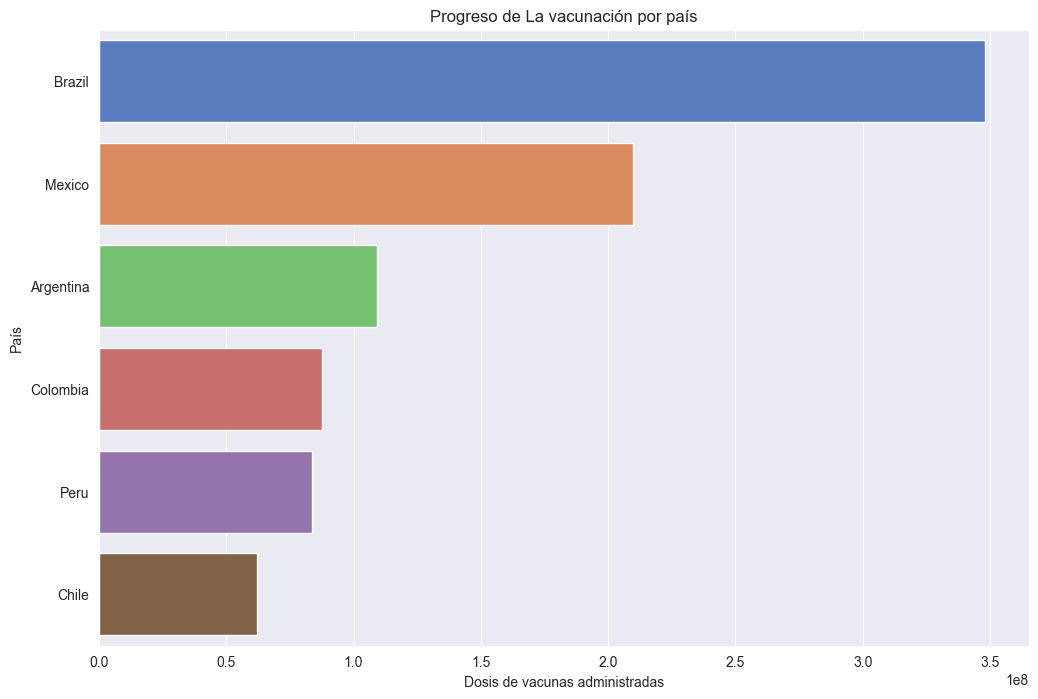

In [61]:
vaccination_data = datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette="muted")
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')

plt.title('Progreso de La vacunación por país')

plt.show()

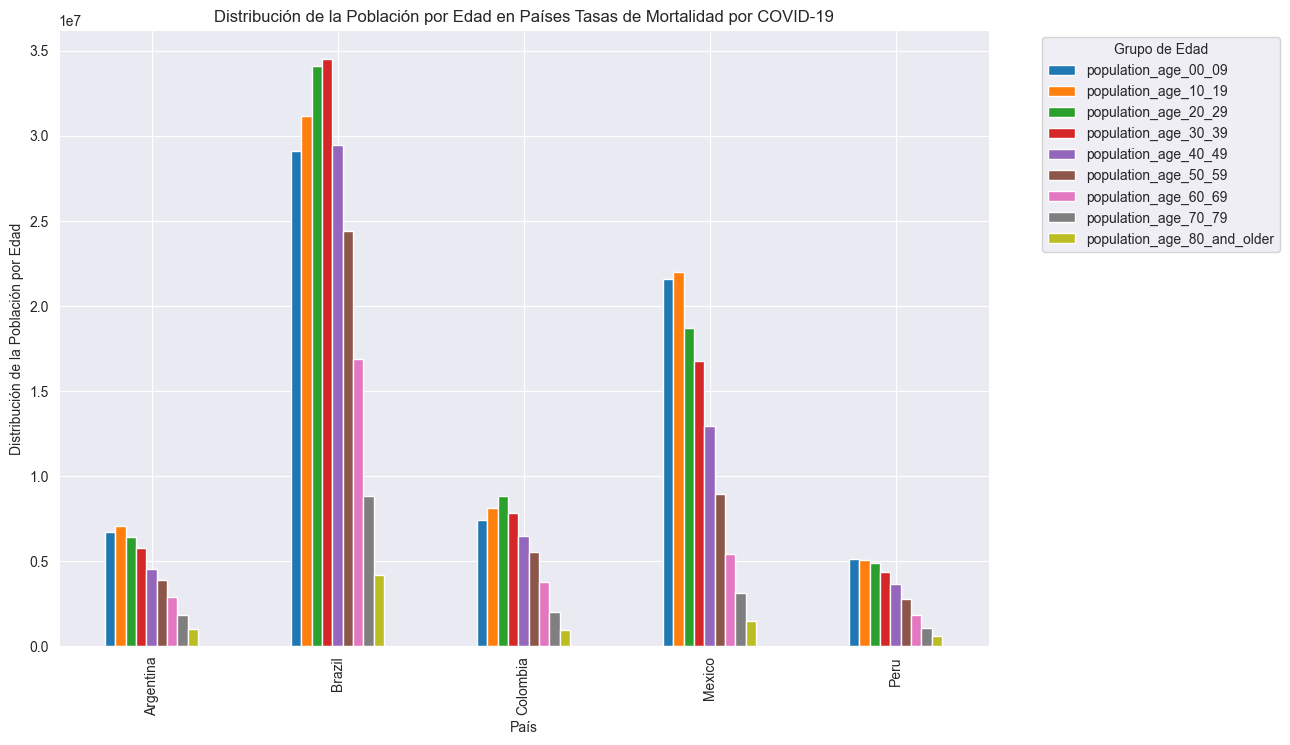

In [62]:
high_mortality_countries = datos_finales.groupby( 'country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = datos_finales[datos_finales['country_name'].isin(high_mortality_countries)].groupby('country_name') [age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')

plt.ylabel('Distribución de la Población por Edad')

plt.title('Distribución de la Población por Edad en Países Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Grupo de Edad')

plt.show()

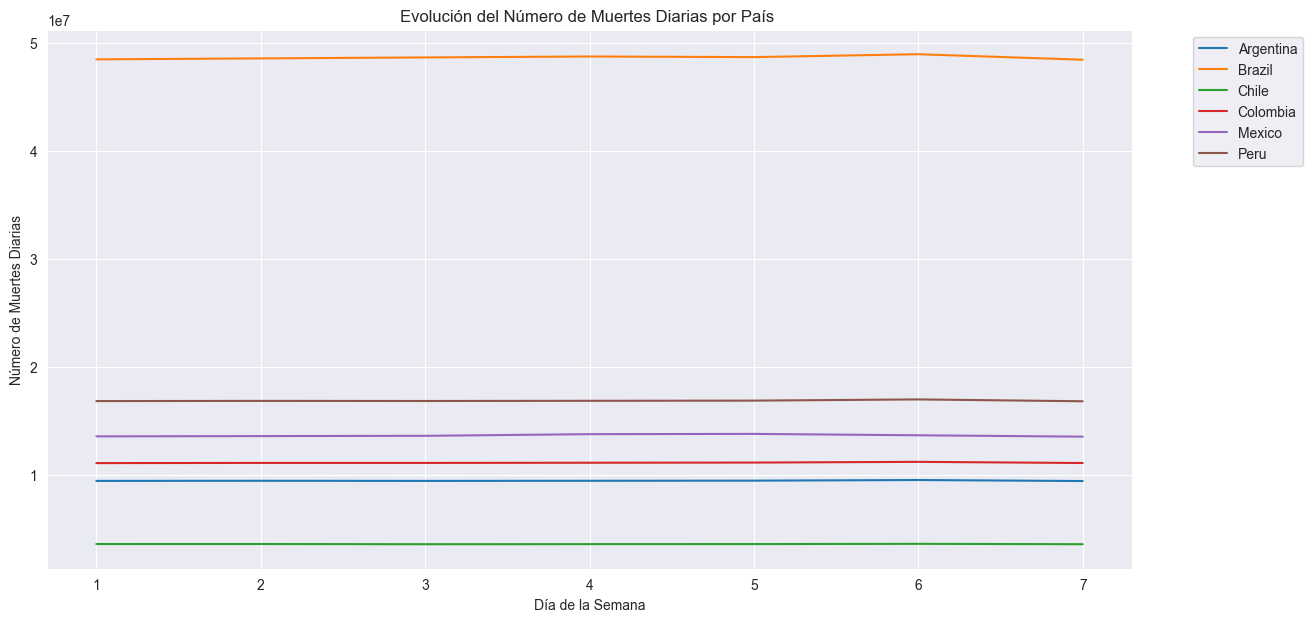

In [65]:
datos_finales['day'] = datos_finales.index.isocalendar().day
day_cases = datos_finales.groupby(['country_name', "day"]) ['cumulative_deceased'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in day_cases["country_name"].unique():
    country_day_cases = day_cases[day_cases['country_name'] == country]
    plt.plot(country_day_cases['day'], country_day_cases["cumulative_deceased"], label=country)

plt.title("Evolución del Número de Muertes Diarias por País ")
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Muertes Diarias')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

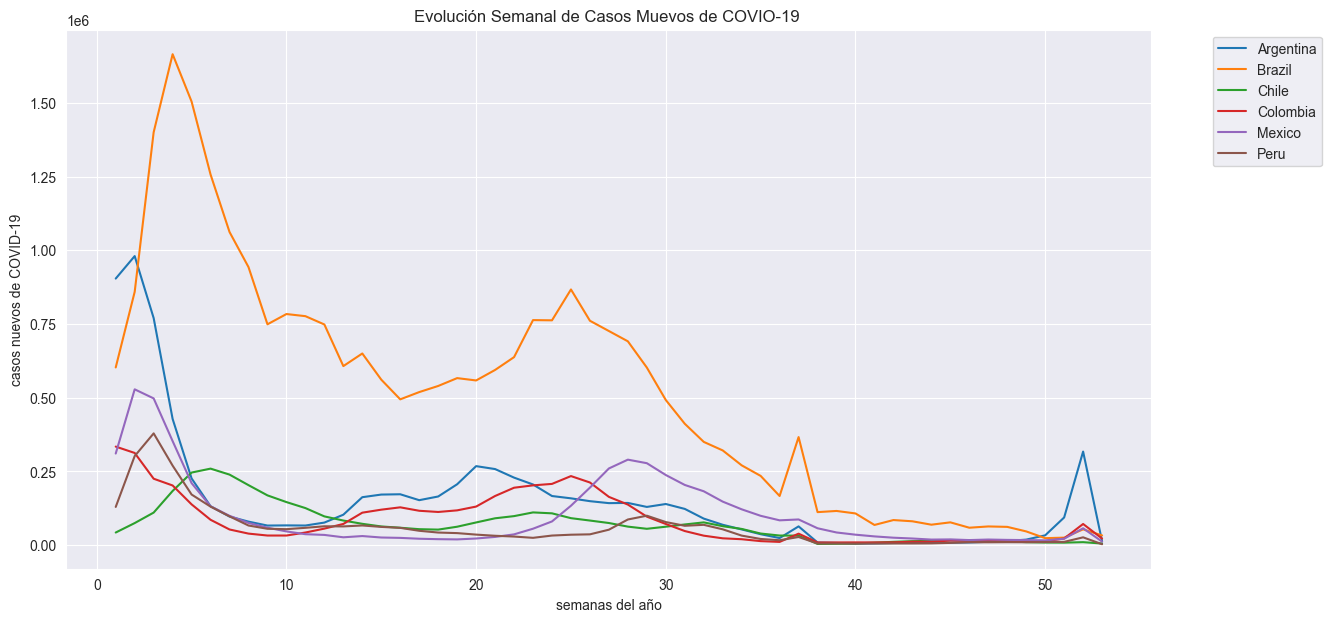

In [63]:
datos_finales['week'] = datos_finales.index.isocalendar().week
weekly_cases = datos_finales.groupby(['country_name', "week"]) ['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in weekly_cases["country_name"].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases["new_confirmed"], label=country)

plt.title("Evolución Semanal de Casos Muevos de COVIO-19 ")
plt.xlabel('semanas del año')
plt.ylabel('casos nuevos de COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

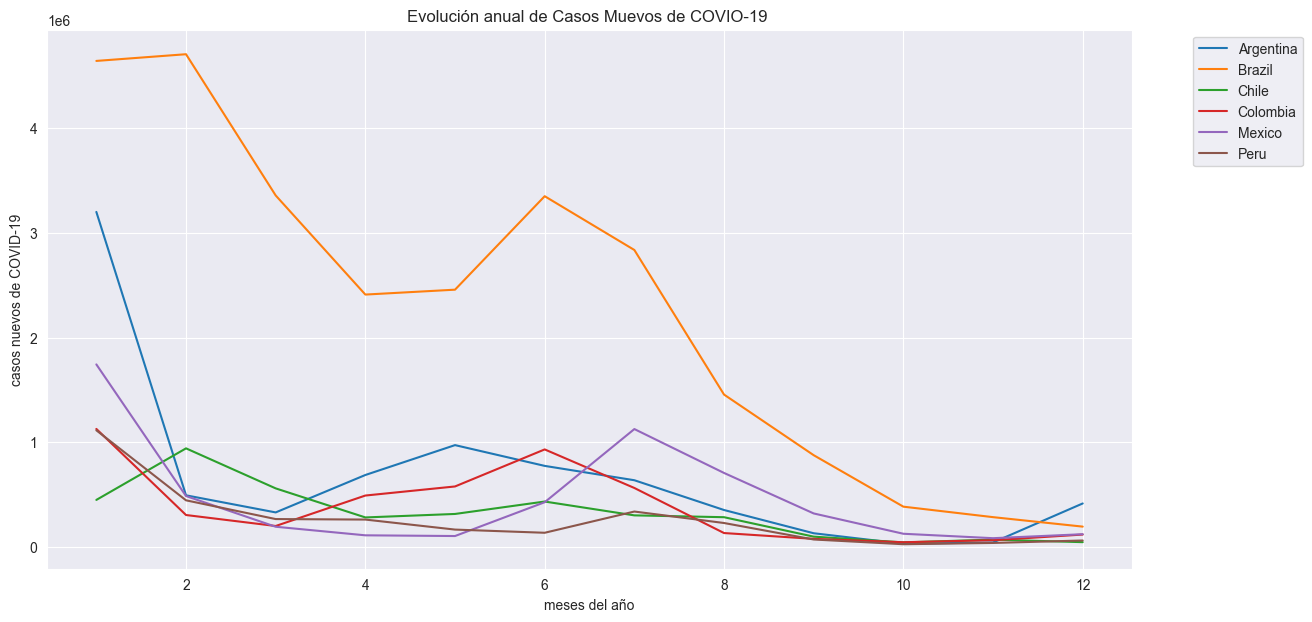

In [64]:
datos_finales['month'] = datos_finales.index.month
yearly_cases = datos_finales.groupby(['country_name', "month"]) ['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases["new_confirmed"], label=country)

plt.title("Evolución anual de Casos Muevos de COVIO-19 ")
plt.xlabel('meses del año')
plt.ylabel('casos nuevos de COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

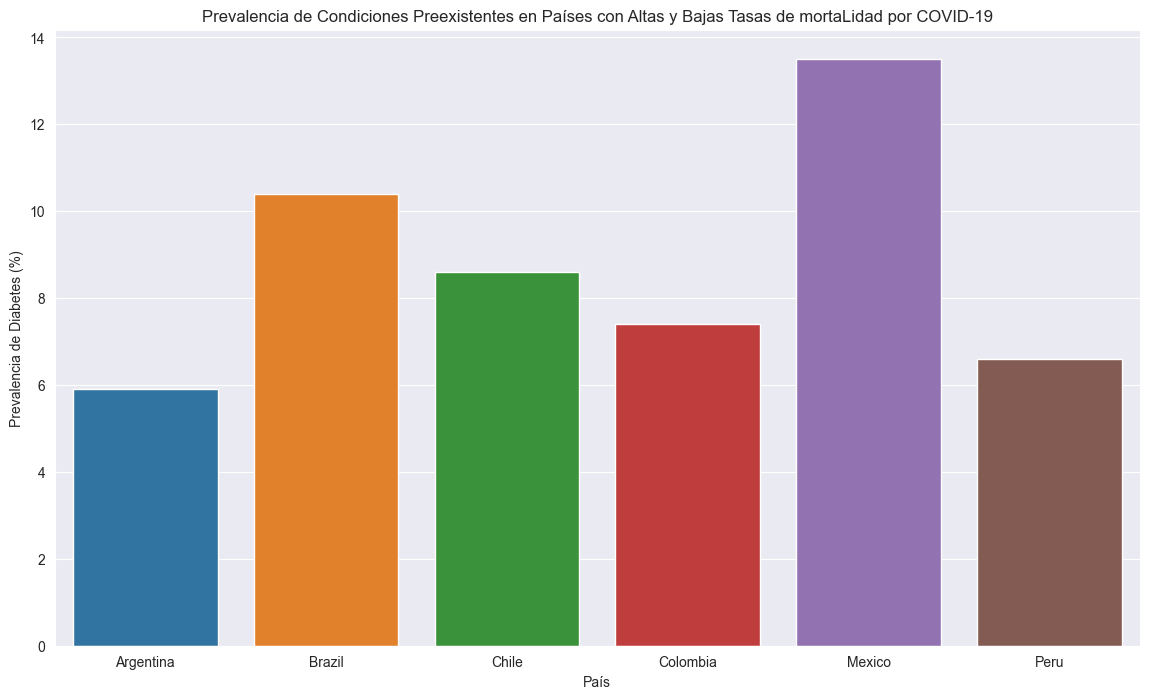

In [66]:
top_countries = datos_finales.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries =  datos_finales.groupby('country_name') ['cumulative_deceased'].max().nsmallest(5).index
conditions_data = datos_finales[datos_finales['country_name'].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x="country_name", y='diabetes_prevalence', hue='country_name')
plt.xlabel("País")
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de mortaLidad por COVID-19')
plt.show()

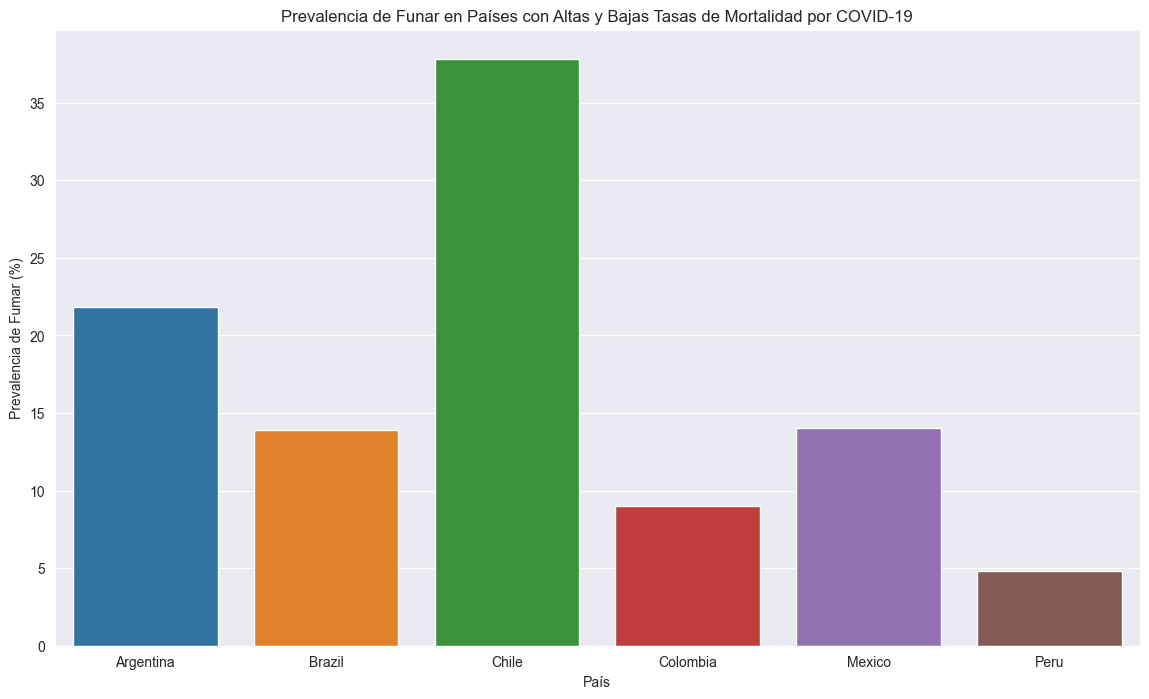

In [67]:
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x="country_name", y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title ('Prevalencia de Funar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_12488\1518996996.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( datos_finales, x='date', y='mortality_rate', estimator='mean', ci=None)


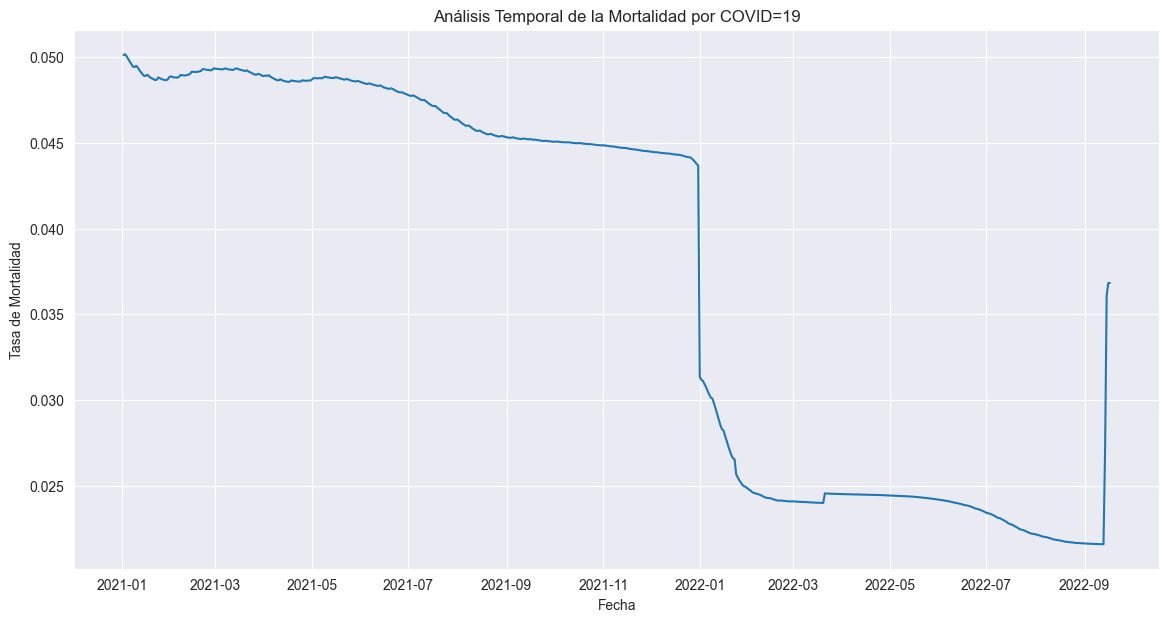

In [68]:
datos_finales['mortality_rate'] = datos_finales['cumulative_deceased'] / datos_finales['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot( datos_finales, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Análisis Temporal de la Mortalidad por COVID=19')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

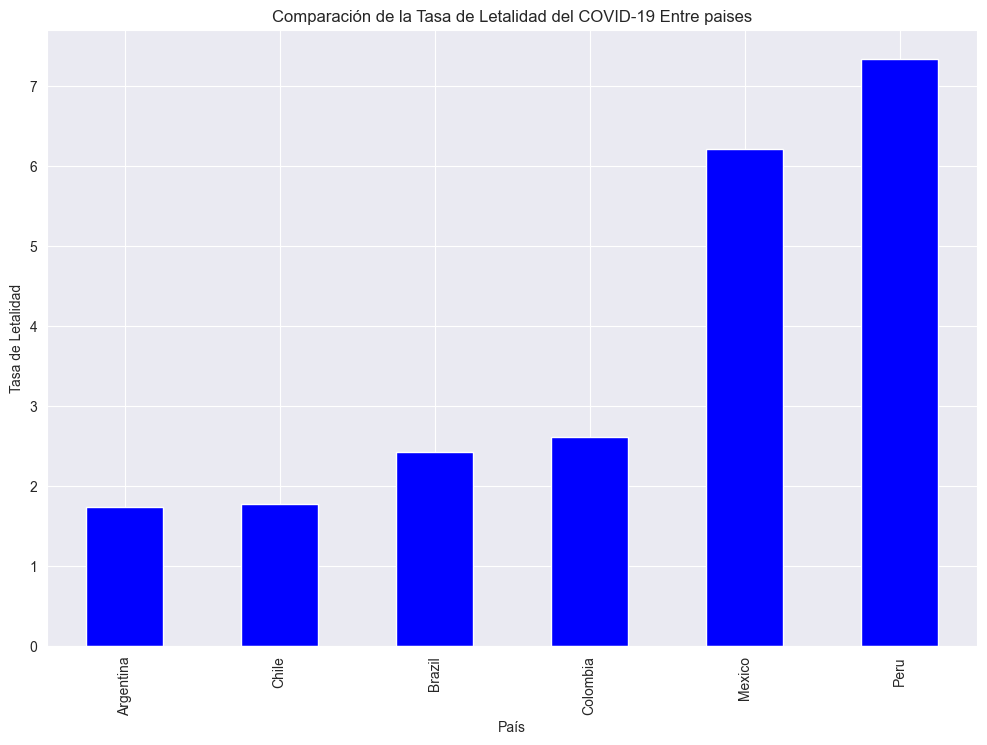

In [70]:
datos_finales ['case_fatality_rate'] = datos_finales['cumulative_deceased'] / datos_finales['cumulative_confirmed'] * 100
fatality_rates = datos_finales.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='blue')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre paises')
plt.show()

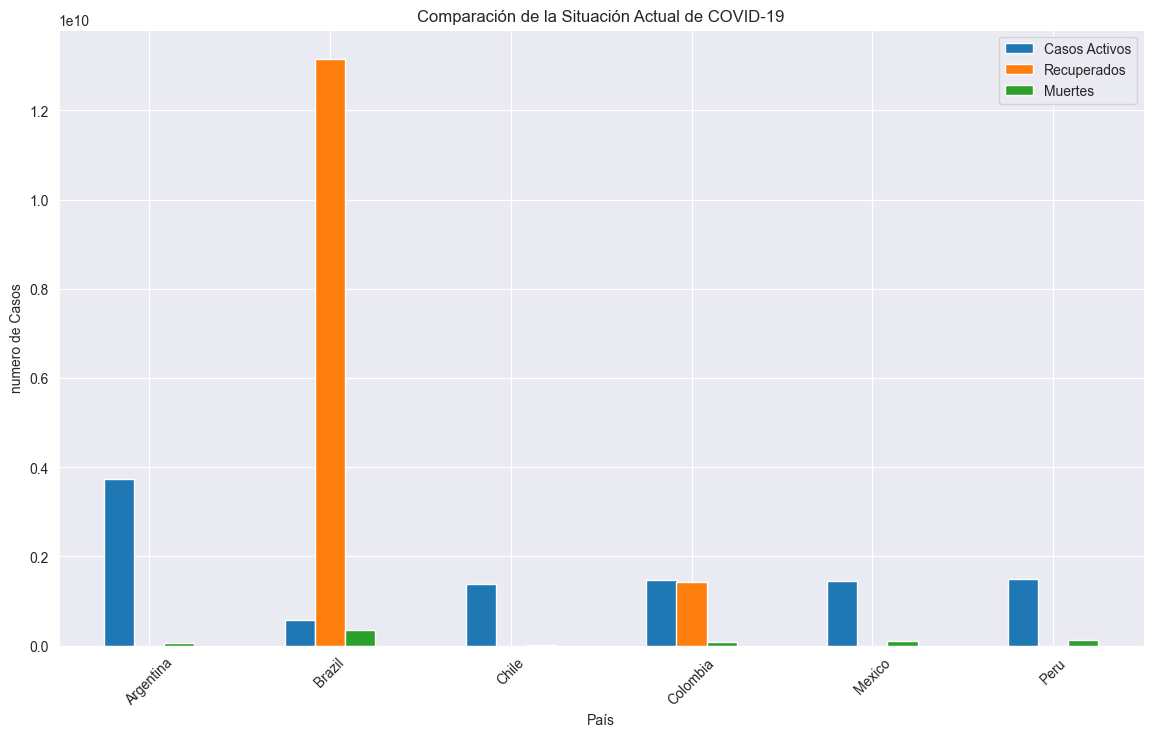

In [69]:

current_situation = datos_finales.groupby('country_name').sum()[['active_cases', 'cumulative_recovered','cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))

plt.title('Comparación de la Situación Actual de COVID-19')
plt.xlabel('País')
plt.ylabel('numero de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

In [71]:
datos_finales.to_csv("datos_latam.csv", index=True)